# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 19:29:57.553599: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T19:30:00.992275
2025-04-14 19:30:00.992275


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 2
MODEL_TO_USE = 1

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 259
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 19:29:55"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

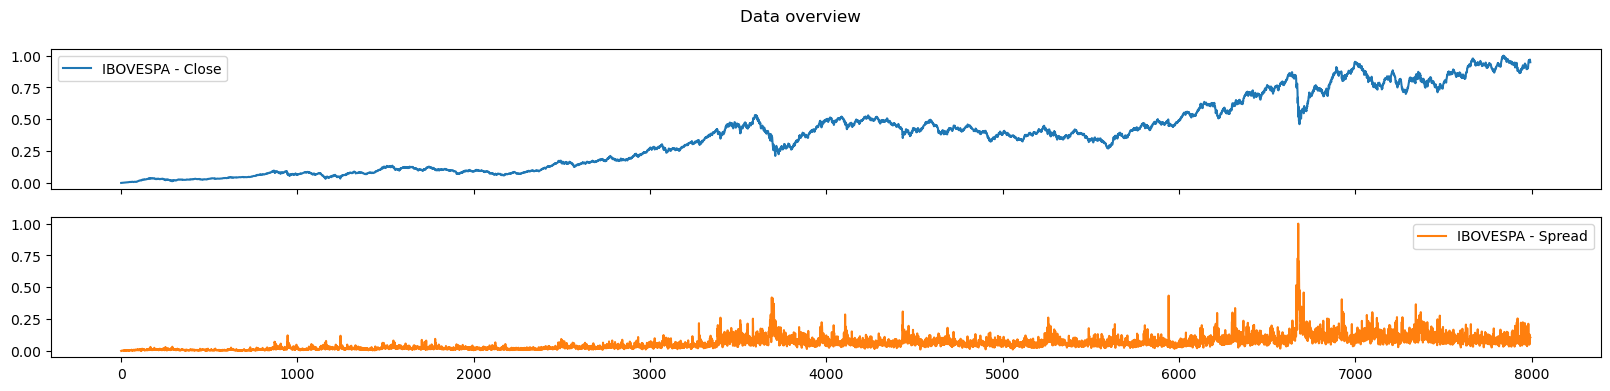

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

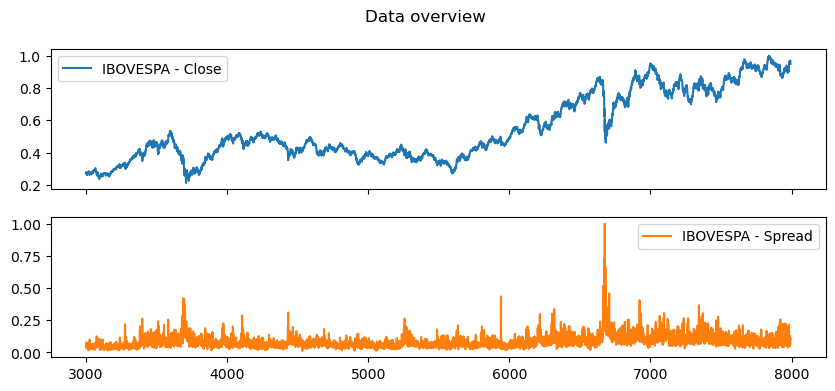

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

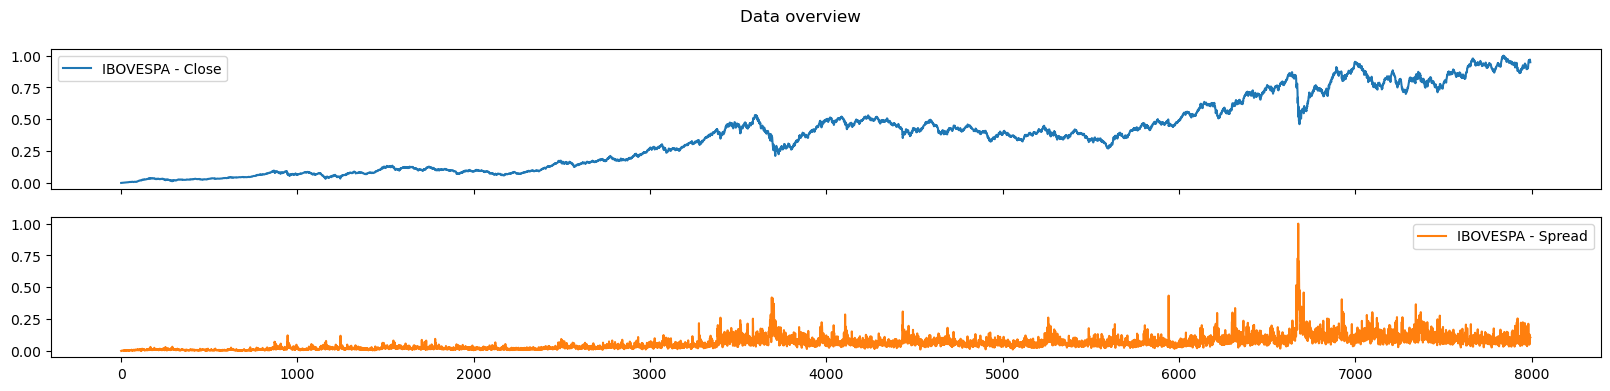

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

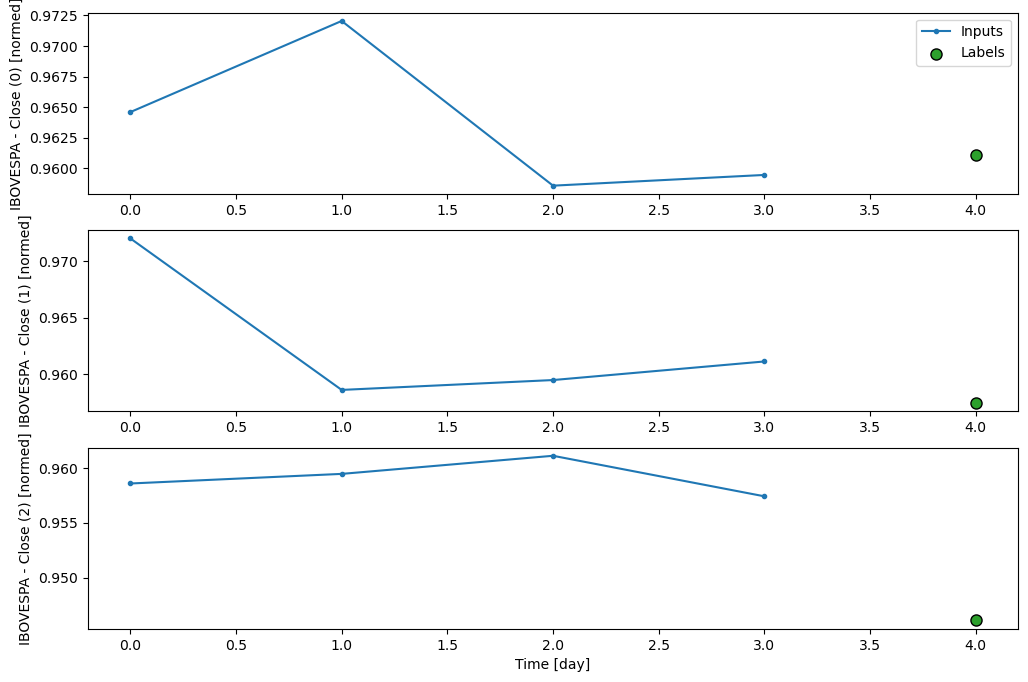

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
# Define the Required Callback Function
class printlearningrate(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        lr = tf.keras.backend.eval(optimizer.learning_rate)
        # lr = tf.keras.backend.eval(optimizer.lr)
        Epoch_count = epoch + 1
        print(f"\nEpoch: {Epoch_count} - LR: {lr}")
        return lr

In [24]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

  # opitimizer AdamW
  # optimizer = tf.keras.optimizers.AdamW(learning_rate=LEARNING_RATE) # weight_decay=0.004
  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=0.004)

  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=1e-6)
  
  def scheduler(epoch, lr):
    decay = LEARNING_DECAY
    decayEveryEpochs = DECAY_EVERY_EPOCHS
    iterations = epoch // decayEveryEpochs
    optimizer = model.optimizer
    # return tf.keras.backend.eval(optimizer.learning_rate)
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % decayEveryEpochs == 0) and (epoch != 0):
        lr = lr * (1 - decay)
        lr = lr * (1. / (1. + decay * iterations))
    print(f"Epoch: {epoch} - Learning rate: {optimizer.learning_rate} - LR: {lr}")
    return lr
    return tf.keras.backend.eval(optimizer.learning_rate)
  
  printlr = printlearningrate() 
  updatelr = tf.keras.callbacks.LearningRateScheduler(scheduler)
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr,early_stopping]) # updatelr])
  return history

Definir modelo da rede e realizar o treinamento

In [25]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [26]:
num_features = df_x_values.shape[1]

num_features

2

In [27]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [28]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [29]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [30]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [31]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11:35 3s/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0142e-05 - root_mean_squared_error: 0.0032

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 59.0932 - mean_squared_error: 1.0566e-04 - root_mean_squared_error: 0.0091   

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 52.4451 - mean_squared_error: 1.3297e-04 - root_mean_squared_error: 0.0108

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 45.7632 - mean_squared_error: 1.3026e-04 - root_mean_squared_error: 0.0109

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 41.5389 - mean_squared_error: 1.3927e-04 - root_mean_squared_error: 0.0114

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 39.0125 - mean_squared_error: 1.6948e-04 - root_mean_squared_error: 0.0125

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 37.0434 - mean_squared_error: 2.0121e-04 - root_mean_squared_error: 0.0136

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 35.1647 - mean_squared_error: 2.2144e-04 - root_mean_squared_error: 0.0143

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 33.8415 - mean_squared_error: 2.4259e-04 - root_mean_squared_error: 0.0150

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 32.6548 - mean_squared_error: 2.6280e-04 - root_mean_squared_error: 0.0156

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 31.4952 - mean_squared_error: 2.9118e-04 - root_mean_squared_error: 0.0164

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 30.5685 - mean_squared_error: 3.3304e-04 - root_mean_squared_error: 0.0174

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 29.7556 - mean_squared_error: 3.9442e-04 - root_mean_squared_error: 0.0186

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 29.1218 - mean_squared_error: 5.6208e-04 - root_mean_squared_error: 0.0211

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 28.5027 - mean_squared_error: 7.5727e-04 - root_mean_squared_error: 0.0237

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 27.9661 - mean_squared_error: 9.0974e-04 - root_mean_squared_error: 0.0258

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 27.4113 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0278    

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 26.9388 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0293

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 26.4957 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0307

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 26.0837 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0320

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 25.6501 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0333

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 25.2767 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 24.9315 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0358

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 24.6633 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0368


Epoch: 1 - LR: 0.009752360172569752
238/238 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 24.4993 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0375 - val_loss: 0.1788 - val_mean_absolute_error: 0.1788 - val_mean_absolute_percentage_error: 19.2116 - val_mean_squared_error: 0.0331 - val_root_mean_squared_error: 0.1820


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.5712 - mean_absolute_error: 0.5712 - mean_absolute_percentage_error: 26803.8906 - mean_squared_error: 0.3263 - root_mean_squared_error: 0.5712

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5444 - mean_absolute_error: 0.5444 - mean_absolute_percentage_error: 10480.1943 - mean_squared_error: 0.2976 - root_mean_squared_error: 0.5451 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4923 - mean_absolute_error: 0.4923 - mean_absolute_percentage_error: 7304.7329 - mean_squared_error: 0.2542 - root_mean_squared_error: 0.5014 

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4343 - mean_absolute_error: 0.4343 - mean_absolute_percentage_error: 5736.0308 - mean_squared_error: 0.2153 - root_mean_squared_error: 0.4575

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3871 - mean_absolute_error: 0.3871 - mean_absolute_percentage_error: 4772.3657 - mean_squared_error: 0.1866 - root_mean_squared_error: 0.4221

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3491 - mean_absolute_error: 0.3491 - mean_absolute_percentage_error: 4112.0283 - mean_squared_error: 0.1651 - root_mean_squared_error: 0.3936

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3183 - mean_absolute_error: 0.3183 - mean_absolute_percentage_error: 3627.6274 - mean_squared_error: 0.1483 - root_mean_squared_error: 0.3702

 70/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2954 - mean_absolute_error: 0.2954 - mean_absolute_percentage_error: 3288.6780 - mean_squared_error: 0.1362 - root_mean_squared_error: 0.3524

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2800 - mean_absolute_error: 0.2800 - mean_absolute_percentage_error: 3070.1829 - mean_squared_error: 0.1282 - root_mean_squared_error: 0.3403

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2609 - mean_absolute_error: 0.2609 - mean_absolute_percentage_error: 2808.7163 - mean_squared_error: 0.1184 - root_mean_squared_error: 0.3251

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2447 - mean_absolute_error: 0.2447 - mean_absolute_percentage_error: 2592.3755 - mean_squared_error: 0.1102 - root_mean_squared_error: 0.3118

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2295 - mean_absolute_error: 0.2295 - mean_absolute_percentage_error: 2393.3723 - mean_squared_error: 0.1025 - root_mean_squared_error: 0.2990

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2178 - mean_absolute_error: 0.2178 - mean_absolute_percentage_error: 2239.7366 - mean_squared_error: 0.0965 - root_mean_squared_error: 0.2888

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2080 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 2106.6345 - mean_squared_error: 0.0913 - root_mean_squared_error: 0.2799

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1992 - mean_absolute_error: 0.1992 - mean_absolute_percentage_error: 1989.9458 - mean_squared_error: 0.0868 - root_mean_squared_error: 0.2717

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1914 - mean_absolute_error: 0.1914 - mean_absolute_percentage_error: 1886.7334 - mean_squared_error: 0.0827 - root_mean_squared_error: 0.2644

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1844 - mean_absolute_error: 0.1844 - mean_absolute_percentage_error: 1794.6992 - mean_squared_error: 0.0790 - root_mean_squared_error: 0.2576

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1779 - mean_absolute_error: 0.1779 - mean_absolute_percentage_error: 1712.0662 - mean_squared_error: 0.0757 - root_mean_squared_error: 0.2513

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1726 - mean_absolute_error: 0.1726 - mean_absolute_percentage_error: 1644.5619 - mean_squared_error: 0.0730 - root_mean_squared_error: 0.2461

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1672 - mean_absolute_error: 0.1672 - mean_absolute_percentage_error: 1576.1389 - mean_squared_error: 0.0702 - root_mean_squared_error: 0.2407

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1624 - mean_absolute_error: 0.1624 - mean_absolute_percentage_error: 1513.7383 - mean_squared_error: 0.0677 - root_mean_squared_error: 0.2357

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1575 - mean_absolute_error: 0.1575 - mean_absolute_percentage_error: 1451.0946 - mean_squared_error: 0.0651 - root_mean_squared_error: 0.2306

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1539 - mean_absolute_error: 0.1539 - mean_absolute_percentage_error: 1403.9402 - mean_squared_error: 0.0632 - root_mean_squared_error: 0.2267

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1498 - mean_absolute_error: 0.1498 - mean_absolute_percentage_error: 1350.7041 - mean_squared_error: 0.0610 - root_mean_squared_error: 0.2223

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1464 - mean_absolute_error: 0.1464 - mean_absolute_percentage_error: 1306.0209 - mean_squared_error: 0.0592 - root_mean_squared_error: 0.2185


Epoch: 2 - LR: 0.009510851465165615
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1461 - mean_absolute_error: 0.1461 - mean_absolute_percentage_error: 1301.7380 - mean_squared_error: 0.0590 - root_mean_squared_error: 0.2181 - val_loss: 0.0691 - val_mean_absolute_error: 0.0691 - val_mean_absolute_percentage_error: 7.3587 - val_mean_squared_error: 0.0056 - val_root_mean_squared_error: 0.0746


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.4873 - mean_absolute_error: 0.4873 - mean_absolute_percentage_error: 22858.9395 - mean_squared_error: 0.2374 - root_mean_squared_error: 0.4873

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4767 - mean_absolute_error: 0.4767 - mean_absolute_percentage_error: 9443.9316 - mean_squared_error: 0.2275 - root_mean_squared_error: 0.4769  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4484 - mean_absolute_error: 0.4484 - mean_absolute_percentage_error: 6684.8789 - mean_squared_error: 0.2051 - root_mean_squared_error: 0.4518

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3999 - mean_absolute_error: 0.3999 - mean_absolute_percentage_error: 5291.7988 - mean_squared_error: 0.1779 - root_mean_squared_error: 0.4179

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3516 - mean_absolute_error: 0.3516 - mean_absolute_percentage_error: 4342.1084 - mean_squared_error: 0.1537 - root_mean_squared_error: 0.3850

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3136 - mean_absolute_error: 0.3136 - mean_absolute_percentage_error: 3707.7568 - mean_squared_error: 0.1354 - root_mean_squared_error: 0.3583

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2834 - mean_absolute_error: 0.2834 - mean_absolute_percentage_error: 3250.2090 - mean_squared_error: 0.1213 - root_mean_squared_error: 0.3364

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2567 - mean_absolute_error: 0.2567 - mean_absolute_percentage_error: 2872.5571 - mean_squared_error: 0.1091 - root_mean_squared_error: 0.3165

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2369 - mean_absolute_error: 0.2369 - mean_absolute_percentage_error: 2604.8501 - mean_squared_error: 0.1002 - root_mean_squared_error: 0.3013

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2188 - mean_absolute_error: 0.2188 - mean_absolute_percentage_error: 2367.7046 - mean_squared_error: 0.0920 - root_mean_squared_error: 0.2869

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2062 - mean_absolute_error: 0.2062 - mean_absolute_percentage_error: 2206.4998 - mean_squared_error: 0.0864 - root_mean_squared_error: 0.2766

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1952 - mean_absolute_error: 0.1952 - mean_absolute_percentage_error: 2067.8926 - mean_squared_error: 0.0815 - root_mean_squared_error: 0.2674

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1855 - mean_absolute_error: 0.1855 - mean_absolute_percentage_error: 1947.2950 - mean_squared_error: 0.0772 - root_mean_squared_error: 0.2591

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1760 - mean_absolute_error: 0.1760 - mean_absolute_percentage_error: 1830.3389 - mean_squared_error: 0.0730 - root_mean_squared_error: 0.2507

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1678 - mean_absolute_error: 0.1678 - mean_absolute_percentage_error: 1727.9427 - mean_squared_error: 0.0692 - root_mean_squared_error: 0.2432

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1604 - mean_absolute_error: 0.1604 - mean_absolute_percentage_error: 1637.4475 - mean_squared_error: 0.0659 - root_mean_squared_error: 0.2364

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1537 - mean_absolute_error: 0.1537 - mean_absolute_percentage_error: 1556.8254 - mean_squared_error: 0.0629 - root_mean_squared_error: 0.2301

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1477 - mean_absolute_error: 0.1477 - mean_absolute_percentage_error: 1484.4949 - mean_squared_error: 0.0602 - root_mean_squared_error: 0.2243

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1422 - mean_absolute_error: 0.1422 - mean_absolute_percentage_error: 1419.2032 - mean_squared_error: 0.0578 - root_mean_squared_error: 0.2189

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1371 - mean_absolute_error: 0.1371 - mean_absolute_percentage_error: 1359.9366 - mean_squared_error: 0.0555 - root_mean_squared_error: 0.2139

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1325 - mean_absolute_error: 0.1325 - mean_absolute_percentage_error: 1305.8739 - mean_squared_error: 0.0535 - root_mean_squared_error: 0.2093

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1283 - mean_absolute_error: 0.1283 - mean_absolute_percentage_error: 1256.3395 - mean_squared_error: 0.0516 - root_mean_squared_error: 0.2050

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1244 - mean_absolute_error: 0.1244 - mean_absolute_percentage_error: 1210.7709 - mean_squared_error: 0.0498 - root_mean_squared_error: 0.2009

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1209 - mean_absolute_error: 0.1209 - mean_absolute_percentage_error: 1168.6998 - mean_squared_error: 0.0482 - root_mean_squared_error: 0.1972

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1173 - mean_absolute_error: 0.1173 - mean_absolute_percentage_error: 1125.9852 - mean_squared_error: 0.0466 - root_mean_squared_error: 0.1933


Epoch: 3 - LR: 0.009275324642658234
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1170 - mean_absolute_error: 0.1170 - mean_absolute_percentage_error: 1122.2777 - mean_squared_error: 0.0464 - root_mean_squared_error: 0.1929 - val_loss: 0.0321 - val_mean_absolute_error: 0.0321 - val_mean_absolute_percentage_error: 3.4120 - val_mean_squared_error: 0.0013 - val_root_mean_squared_error: 0.0356


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1273 - mean_absolute_error: 0.1273 - mean_absolute_percentage_error: 5972.0811 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1273

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0948 - mean_absolute_error: 0.0948 - mean_absolute_percentage_error: 2211.8059 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0996 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0806 - mean_absolute_error: 0.0806 - mean_absolute_percentage_error: 1588.9292 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0874

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 1300.4762 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0804

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 1183.1396 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0771

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 1087.5062 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0742

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 972.8965 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0704 

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 844.1559 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0657

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 730.4660 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0611

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 653.0842 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0577

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 592.0073 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0549

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 542.3943 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0524

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 501.1939 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0503

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 466.3716 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0484

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 433.7620 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0466

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 410.6032 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0453

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 394.3944 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0444

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 375.5197 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0432

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 356.7563 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0421

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 339.9506 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0410

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 324.8040 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0401

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 311.0754 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 298.5681 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0384

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 287.1244 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0376

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 276.6103 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 266.9148 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0364

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 257.9425 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359


Epoch: 4 - LR: 0.009045630693435669
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 255.3812 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358 - val_loss: 0.0357 - val_mean_absolute_error: 0.0357 - val_mean_absolute_percentage_error: 3.8036 - val_mean_squared_error: 0.0015 - val_root_mean_squared_error: 0.0391


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0982 - mean_absolute_error: 0.0982 - mean_absolute_percentage_error: 4610.0195 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0982

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 1796.3492 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0777 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 1171.4291 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0639

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 935.9698 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0571 

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 802.2243 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0527

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 693.7626 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0489

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 605.1265 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0455

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 532.0840 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0425

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 476.2439 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0400

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 432.0236 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 396.0361 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 366.1263 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 340.8396 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 319.1510 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 300.3321 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0316

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 283.8217 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 269.2000 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0302

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 256.1470 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 245.5354 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 234.8254 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 226.0289 - mean_squared_error: 9.9786e-04 - root_mean_squared_error: 0.0281

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 217.0675 - mean_squared_error: 9.6522e-04 - root_mean_squared_error: 0.0276

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 208.8553 - mean_squared_error: 9.3559e-04 - root_mean_squared_error: 0.0272

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 201.3062 - mean_squared_error: 9.1175e-04 - root_mean_squared_error: 0.0269

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 194.3415 - mean_squared_error: 8.9380e-04 - root_mean_squared_error: 0.0267


Epoch: 5 - LR: 0.008821624331176281
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 188.5166 - mean_squared_error: 8.8064e-04 - root_mean_squared_error: 0.0265 - val_loss: 0.0328 - val_mean_absolute_error: 0.0328 - val_mean_absolute_percentage_error: 3.5043 - val_mean_squared_error: 0.0012 - val_root_mean_squared_error: 0.0349


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 2312.4202 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0493

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 839.8710 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0376  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 573.5627 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0341

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 448.7868 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0316

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 385.8925 - mean_squared_error: 9.3182e-04 - root_mean_squared_error: 0.0299

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 340.2271 - mean_squared_error: 8.5026e-04 - root_mean_squared_error: 0.0284

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 297.7676 - mean_squared_error: 7.6782e-04 - root_mean_squared_error: 0.0268

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 265.7457 - mean_squared_error: 7.0169e-04 - root_mean_squared_error: 0.0255

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 240.6816 - mean_squared_error: 6.4776e-04 - root_mean_squared_error: 0.0244

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 222.2712 - mean_squared_error: 6.0697e-04 - root_mean_squared_error: 0.0235

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 203.6533 - mean_squared_error: 5.6485e-04 - root_mean_squared_error: 0.0226

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 189.5176 - mean_squared_error: 5.3255e-04 - root_mean_squared_error: 0.0219

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 177.4180 - mean_squared_error: 5.0519e-04 - root_mean_squared_error: 0.0213

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 166.9490 - mean_squared_error: 4.8444e-04 - root_mean_squared_error: 0.0208

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 157.7936 - mean_squared_error: 4.6990e-04 - root_mean_squared_error: 0.0205

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 149.6990 - mean_squared_error: 4.5714e-04 - root_mean_squared_error: 0.0203

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 142.4840 - mean_squared_error: 4.4554e-04 - root_mean_squared_error: 0.0200

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 136.0056 - mean_squared_error: 4.3459e-04 - root_mean_squared_error: 0.0198

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 130.1558 - mean_squared_error: 4.2454e-04 - root_mean_squared_error: 0.0196

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 124.8496 - mean_squared_error: 4.1614e-04 - root_mean_squared_error: 0.0194

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 120.4739 - mean_squared_error: 4.0956e-04 - root_mean_squared_error: 0.0193

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 115.9977 - mean_squared_error: 4.0291e-04 - root_mean_squared_error: 0.0191

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 111.8818 - mean_squared_error: 3.9851e-04 - root_mean_squared_error: 0.0191

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 108.0868 - mean_squared_error: 3.9856e-04 - root_mean_squared_error: 0.0191

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 104.5750 - mean_squared_error: 4.0205e-04 - root_mean_squared_error: 0.0192


Epoch: 6 - LR: 0.008603165857493877
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 103.5723 - mean_squared_error: 4.0345e-04 - root_mean_squared_error: 0.0193 - val_loss: 0.0232 - val_mean_absolute_error: 0.0232 - val_mean_absolute_percentage_error: 2.5581 - val_mean_squared_error: 6.8512e-04 - val_root_mean_squared_error: 0.0262


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.1435 - mean_absolute_error: 0.1435 - mean_absolute_percentage_error: 6730.5107 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1435

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1236 - mean_absolute_error: 0.1236 - mean_absolute_percentage_error: 2702.3113 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1261 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0974 - mean_absolute_error: 0.0974 - mean_absolute_percentage_error: 1771.2264 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1058

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 1353.4077 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0930

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 1108.6300 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0841

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 945.8207 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0774 

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 828.5422 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0722

 70/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 739.5712 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0680

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 669.5009 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0644

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 612.7129 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0614

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 565.6691 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0588

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 525.9762 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0565

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 495.1673 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0547

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 468.1135 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0532

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 451.8248 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0522

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 429.6095 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0509

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 409.6761 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0496

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 389.7843 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0484

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 371.9062 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0472

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 354.2102 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0461

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 341.0486 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0452

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 327.6278 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0442

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 316.5025 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0434

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 305.0772 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0427

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 294.5247 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0419


Epoch: 7 - LR: 0.00839011650532484
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 286.6451 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0414 - val_loss: 0.0145 - val_mean_absolute_error: 0.0145 - val_mean_absolute_percentage_error: 1.5440 - val_mean_squared_error: 2.8152e-04 - val_root_mean_squared_error: 0.0168


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 1421.4695 - mean_squared_error: 9.1625e-04 - root_mean_squared_error: 0.0303

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 530.4268 - mean_squared_error: 5.3662e-04 - root_mean_squared_error: 0.0229  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 339.8759 - mean_squared_error: 4.1792e-04 - root_mean_squared_error: 0.0201

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 263.9497 - mean_squared_error: 3.4974e-04 - root_mean_squared_error: 0.0183

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 222.2530 - mean_squared_error: 3.0774e-04 - root_mean_squared_error: 0.0170

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 190.4806 - mean_squared_error: 2.7290e-04 - root_mean_squared_error: 0.0159

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 167.4621 - mean_squared_error: 2.4601e-04 - root_mean_squared_error: 0.0150

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 151.4877 - mean_squared_error: 2.2646e-04 - root_mean_squared_error: 0.0144

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 137.3188 - mean_squared_error: 2.0851e-04 - root_mean_squared_error: 0.0137

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 125.8329 - mean_squared_error: 1.9363e-04 - root_mean_squared_error: 0.0131

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 115.4502 - mean_squared_error: 1.8018e-04 - root_mean_squared_error: 0.0126

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 107.5536 - mean_squared_error: 1.7068e-04 - root_mean_squared_error: 0.0123

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 100.7902 - mean_squared_error: 1.6402e-04 - root_mean_squared_error: 0.0120

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 95.4892 - mean_squared_error: 1.6171e-04 - root_mean_squared_error: 0.0120 

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 90.2997 - mean_squared_error: 1.6152e-04 - root_mean_squared_error: 0.0120

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 86.1433 - mean_squared_error: 1.6129e-04 - root_mean_squared_error: 0.0121

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 81.9990 - mean_squared_error: 1.6061e-04 - root_mean_squared_error: 0.0121

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 78.2773 - mean_squared_error: 1.5958e-04 - root_mean_squared_error: 0.0121

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 74.9153 - mean_squared_error: 1.5835e-04 - root_mean_squared_error: 0.0121

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 71.8611 - mean_squared_error: 1.5697e-04 - root_mean_squared_error: 0.0120

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 69.0723 - mean_squared_error: 1.5551e-04 - root_mean_squared_error: 0.0120

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 66.5147 - mean_squared_error: 1.5406e-04 - root_mean_squared_error: 0.0120

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 64.1612 - mean_squared_error: 1.5310e-04 - root_mean_squared_error: 0.0119

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 62.1966 - mean_squared_error: 1.5234e-04 - root_mean_squared_error: 0.0119

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 59.9707 - mean_squared_error: 1.5149e-04 - root_mean_squared_error: 0.0119


Epoch: 8 - LR: 0.008182344026863575
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 59.7775 - mean_squared_error: 1.5141e-04 - root_mean_squared_error: 0.0119 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7088 - val_mean_squared_error: 6.5035e-05 - val_root_mean_squared_error: 0.0081


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 1118.7310 - mean_squared_error: 5.6820e-04 - root_mean_squared_error: 0.0238

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 431.6353 - mean_squared_error: 2.8605e-04 - root_mean_squared_error: 0.0165  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 261.6118 - mean_squared_error: 1.8922e-04 - root_mean_squared_error: 0.0132

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 199.8565 - mean_squared_error: 1.5387e-04 - root_mean_squared_error: 0.0118

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 164.0878 - mean_squared_error: 1.3311e-04 - root_mean_squared_error: 0.0110

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 140.5358 - mean_squared_error: 1.1985e-04 - root_mean_squared_error: 0.0104

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 123.5287 - mean_squared_error: 1.0949e-04 - root_mean_squared_error: 0.0099

 70/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 110.6032 - mean_squared_error: 1.0107e-04 - root_mean_squared_error: 0.0095

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 100.4245 - mean_squared_error: 9.4151e-05 - root_mean_squared_error: 0.0092

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 92.1542 - mean_squared_error: 8.8362e-05 - root_mean_squared_error: 0.0089 

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 85.2822 - mean_squared_error: 8.3482e-05 - root_mean_squared_error: 0.0086

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 79.4693 - mean_squared_error: 7.9437e-05 - root_mean_squared_error: 0.0084

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 74.4846 - mean_squared_error: 7.6459e-05 - root_mean_squared_error: 0.0083

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 70.1579 - mean_squared_error: 7.4175e-05 - root_mean_squared_error: 0.0082

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 66.0037 - mean_squared_error: 7.1996e-05 - root_mean_squared_error: 0.0080

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 62.6779 - mean_squared_error: 7.0292e-05 - root_mean_squared_error: 0.0080

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 59.7070 - mean_squared_error: 6.8751e-05 - root_mean_squared_error: 0.0079

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 57.0355 - mean_squared_error: 6.7354e-05 - root_mean_squared_error: 0.0078

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 54.8508 - mean_squared_error: 6.6219e-05 - root_mean_squared_error: 0.0078

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 52.6341 - mean_squared_error: 6.5128e-05 - root_mean_squared_error: 0.0077

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 50.6095 - mean_squared_error: 6.4198e-05 - root_mean_squared_error: 0.0077

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 48.7523 - mean_squared_error: 6.3508e-05 - root_mean_squared_error: 0.0076

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 47.0426 - mean_squared_error: 6.3280e-05 - root_mean_squared_error: 0.0076

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 45.4624 - mean_squared_error: 6.3275e-05 - root_mean_squared_error: 0.0076


Epoch: 9 - LR: 0.007979716174304485
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 44.1393 - mean_squared_error: 6.3411e-05 - root_mean_squared_error: 0.0077 - val_loss: 0.0077 - val_mean_absolute_error: 0.0077 - val_mean_absolute_percentage_error: 0.8214 - val_mean_squared_error: 9.3098e-05 - val_root_mean_squared_error: 0.0096


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 2804.2378 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0597

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 1027.1311 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0453 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 693.8159 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0390 

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 537.6826 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0349

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 444.1451 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 381.1207 - mean_squared_error: 9.7596e-04 - root_mean_squared_error: 0.0296

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 339.3095 - mean_squared_error: 8.8142e-04 - root_mean_squared_error: 0.0279

 70/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 303.4111 - mean_squared_error: 7.9801e-04 - root_mean_squared_error: 0.0264

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 277.6395 - mean_squared_error: 7.3681e-04 - root_mean_squared_error: 0.0252

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 254.1680 - mean_squared_error: 6.8023e-04 - root_mean_squared_error: 0.0241

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 236.5209 - mean_squared_error: 6.3732e-04 - root_mean_squared_error: 0.0233

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 219.8546 - mean_squared_error: 5.9672e-04 - root_mean_squared_error: 0.0224

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 206.9362 - mean_squared_error: 5.6541e-04 - root_mean_squared_error: 0.0217

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 194.4303 - mean_squared_error: 5.3555e-04 - root_mean_squared_error: 0.0211

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 185.5718 - mean_squared_error: 5.1456e-04 - root_mean_squared_error: 0.0206

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 177.5645 - mean_squared_error: 4.9554e-04 - root_mean_squared_error: 0.0202

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 168.5715 - mean_squared_error: 4.7414e-04 - root_mean_squared_error: 0.0198

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 160.5318 - mean_squared_error: 4.5487e-04 - root_mean_squared_error: 0.0193

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 153.2976 - mean_squared_error: 4.3744e-04 - root_mean_squared_error: 0.0189

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 147.3772 - mean_squared_error: 4.2312e-04 - root_mean_squared_error: 0.0186

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 141.3651 - mean_squared_error: 4.0857e-04 - root_mean_squared_error: 0.0182

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 135.8714 - mean_squared_error: 3.9531e-04 - root_mean_squared_error: 0.0179

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 130.8304 - mean_squared_error: 3.8350e-04 - root_mean_squared_error: 0.0176

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 126.1890 - mean_squared_error: 3.7374e-04 - root_mean_squared_error: 0.0174

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 121.8989 - mean_squared_error: 3.6530e-04 - root_mean_squared_error: 0.0173


Epoch: 10 - LR: 0.0077821058221161366
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 119.0837 - mean_squared_error: 3.5985e-04 - root_mean_squared_error: 0.0171 - val_loss: 0.0083 - val_mean_absolute_error: 0.0083 - val_mean_absolute_percentage_error: 0.9120 - val_mean_squared_error: 1.0339e-04 - val_root_mean_squared_error: 0.0102


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 3165.5571 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0674

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 1230.8131 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0530 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 802.8764 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0437 

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 611.7618 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0381

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 491.4173 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 426.0184 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 372.7998 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

 70/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 332.5036 - mean_squared_error: 9.1318e-04 - root_mean_squared_error: 0.0276

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 300.8044 - mean_squared_error: 8.3056e-04 - root_mean_squared_error: 0.0261

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 275.1411 - mean_squared_error: 7.6312e-04 - root_mean_squared_error: 0.0249

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 253.8930 - mean_squared_error: 7.0701e-04 - root_mean_squared_error: 0.0238

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 235.9825 - mean_squared_error: 6.5978e-04 - root_mean_squared_error: 0.0229

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 220.6651 - mean_squared_error: 6.2034e-04 - root_mean_squared_error: 0.0221

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 207.4120 - mean_squared_error: 5.8820e-04 - root_mean_squared_error: 0.0215

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 194.7301 - mean_squared_error: 5.5836e-04 - root_mean_squared_error: 0.0210

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 185.5607 - mean_squared_error: 5.3677e-04 - root_mean_squared_error: 0.0205

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 177.2964 - mean_squared_error: 5.1716e-04 - root_mean_squared_error: 0.0202

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 169.0157 - mean_squared_error: 4.9731e-04 - root_mean_squared_error: 0.0198

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 162.2593 - mean_squared_error: 4.8099e-04 - root_mean_squared_error: 0.0194

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 155.4176 - mean_squared_error: 4.6435e-04 - root_mean_squared_error: 0.0191

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 149.1821 - mean_squared_error: 4.4912e-04 - root_mean_squared_error: 0.0188

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 143.4733 - mean_squared_error: 4.3515e-04 - root_mean_squared_error: 0.0185

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 138.2264 - mean_squared_error: 4.2273e-04 - root_mean_squared_error: 0.0182

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 133.3849 - mean_squared_error: 4.1138e-04 - root_mean_squared_error: 0.0180

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 128.9026 - mean_squared_error: 4.0094e-04 - root_mean_squared_error: 0.0178


Epoch: 11 - LR: 0.007589389570057392
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 128.4732 - mean_squared_error: 3.9995e-04 - root_mean_squared_error: 0.0177 - val_loss: 0.0074 - val_mean_absolute_error: 0.0074 - val_mean_absolute_percentage_error: 0.8118 - val_mean_squared_error: 8.3818e-05 - val_root_mean_squared_error: 0.0092


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 2455.2266 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0523

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 1072.3019 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0419 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 689.2060 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0355 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 526.3472 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 423.4975 - mean_squared_error: 9.0774e-04 - root_mean_squared_error: 0.0289

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 357.6533 - mean_squared_error: 7.8875e-04 - root_mean_squared_error: 0.0268

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 311.2716 - mean_squared_error: 7.0047e-04 - root_mean_squared_error: 0.0251

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 276.5839 - mean_squared_error: 6.3192e-04 - root_mean_squared_error: 0.0236

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 249.5742 - mean_squared_error: 5.7705e-04 - root_mean_squared_error: 0.0225

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 227.8634 - mean_squared_error: 5.3207e-04 - root_mean_squared_error: 0.0215

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 209.9819 - mean_squared_error: 4.9454e-04 - root_mean_squared_error: 0.0206

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 194.9678 - mean_squared_error: 4.6282e-04 - root_mean_squared_error: 0.0198

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 182.1622 - mean_squared_error: 4.3593e-04 - root_mean_squared_error: 0.0192

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 171.1039 - mean_squared_error: 4.1327e-04 - root_mean_squared_error: 0.0186

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 161.4427 - mean_squared_error: 3.9370e-04 - root_mean_squared_error: 0.0182

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 152.1216 - mean_squared_error: 3.7478e-04 - root_mean_squared_error: 0.0177

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 144.6250 - mean_squared_error: 3.5946e-04 - root_mean_squared_error: 0.0173

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 137.9039 - mean_squared_error: 3.4562e-04 - root_mean_squared_error: 0.0169

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 132.4202 - mean_squared_error: 3.3426e-04 - root_mean_squared_error: 0.0166

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 126.8684 - mean_squared_error: 3.2278e-04 - root_mean_squared_error: 0.0163

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 121.8091 - mean_squared_error: 3.1235e-04 - root_mean_squared_error: 0.0161

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 117.1773 - mean_squared_error: 3.0290e-04 - root_mean_squared_error: 0.0158

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 113.3309 - mean_squared_error: 2.9560e-04 - root_mean_squared_error: 0.0156

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 109.3734 - mean_squared_error: 2.8865e-04 - root_mean_squared_error: 0.0154

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 106.0645 - mean_squared_error: 2.8302e-04 - root_mean_squared_error: 0.0153


Epoch: 12 - LR: 0.007401445880532265
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 104.3210 - mean_squared_error: 2.8007e-04 - root_mean_squared_error: 0.0152 - val_loss: 0.0092 - val_mean_absolute_error: 0.0092 - val_mean_absolute_percentage_error: 0.9806 - val_mean_squared_error: 1.2733e-04 - val_root_mean_squared_error: 0.0113


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 2894.0581 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0616

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 1124.4077 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0483 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 732.1572 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0397 

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 544.8615 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0341

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 447.5057 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 382.4249 - mean_squared_error: 9.3500e-04 - root_mean_squared_error: 0.0283

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 335.3920 - mean_squared_error: 8.2692e-04 - root_mean_squared_error: 0.0264

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 299.6613 - mean_squared_error: 7.4380e-04 - root_mean_squared_error: 0.0248

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 271.5036 - mean_squared_error: 6.7773e-04 - root_mean_squared_error: 0.0236

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 248.6559 - mean_squared_error: 6.2381e-04 - root_mean_squared_error: 0.0225

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 231.4494 - mean_squared_error: 5.8309e-04 - root_mean_squared_error: 0.0216

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 215.1778 - mean_squared_error: 5.4465e-04 - root_mean_squared_error: 0.0208

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 201.2532 - mean_squared_error: 5.1217e-04 - root_mean_squared_error: 0.0201

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 189.1893 - mean_squared_error: 4.8437e-04 - root_mean_squared_error: 0.0195

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 179.6203 - mean_squared_error: 4.6245e-04 - root_mean_squared_error: 0.0190

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 172.8863 - mean_squared_error: 4.4709e-04 - root_mean_squared_error: 0.0187

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 164.1795 - mean_squared_error: 4.2723e-04 - root_mean_squared_error: 0.0182

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 157.1298 - mean_squared_error: 4.1107e-04 - root_mean_squared_error: 0.0179

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 150.0408 - mean_squared_error: 3.9481e-04 - root_mean_squared_error: 0.0175

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 143.6233 - mean_squared_error: 3.8007e-04 - root_mean_squared_error: 0.0171

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 137.7831 - mean_squared_error: 3.6667e-04 - root_mean_squared_error: 0.0168

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 132.4435 - mean_squared_error: 3.5455e-04 - root_mean_squared_error: 0.0165

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 127.0743 - mean_squared_error: 3.4311e-04 - root_mean_squared_error: 0.0163

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 122.5957 - mean_squared_error: 3.3476e-04 - root_mean_squared_error: 0.0161

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 118.4538 - mean_squared_error: 3.2780e-04 - root_mean_squared_error: 0.0160


Epoch: 13 - LR: 0.007218156475573778
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 117.2718 - mean_squared_error: 3.2591e-04 - root_mean_squared_error: 0.0159 - val_loss: 0.0158 - val_mean_absolute_error: 0.0158 - val_mean_absolute_percentage_error: 1.6899 - val_mean_squared_error: 3.0914e-04 - val_root_mean_squared_error: 0.0176


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 2412.2581 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0514

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 932.7372 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0397  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 596.8309 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0336

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 463.0473 - mean_squared_error: 9.7612e-04 - root_mean_squared_error: 0.0302

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 403.5709 - mean_squared_error: 8.7539e-04 - root_mean_squared_error: 0.0284

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 370.7129 - mean_squared_error: 8.1702e-04 - root_mean_squared_error: 0.0274

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 348.4802 - mean_squared_error: 7.7629e-04 - root_mean_squared_error: 0.0266

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 307.9696 - mean_squared_error: 6.9970e-04 - root_mean_squared_error: 0.0251

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 273.7170 - mean_squared_error: 6.3233e-04 - root_mean_squared_error: 0.0237

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 247.0054 - mean_squared_error: 5.7807e-04 - root_mean_squared_error: 0.0226

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 227.4797 - mean_squared_error: 5.3752e-04 - root_mean_squared_error: 0.0216

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 211.1071 - mean_squared_error: 5.0297e-04 - root_mean_squared_error: 0.0208

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 195.7342 - mean_squared_error: 4.7020e-04 - root_mean_squared_error: 0.0201

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 182.6600 - mean_squared_error: 4.4236e-04 - root_mean_squared_error: 0.0194

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 172.4526 - mean_squared_error: 4.2113e-04 - root_mean_squared_error: 0.0189

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 162.5032 - mean_squared_error: 4.0069e-04 - root_mean_squared_error: 0.0184

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 153.7501 - mean_squared_error: 3.8273e-04 - root_mean_squared_error: 0.0179

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 145.9827 - mean_squared_error: 3.6672e-04 - root_mean_squared_error: 0.0175

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 139.0380 - mean_squared_error: 3.5229e-04 - root_mean_squared_error: 0.0172

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 132.7881 - mean_squared_error: 3.3921e-04 - root_mean_squared_error: 0.0168

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 127.6731 - mean_squared_error: 3.2849e-04 - root_mean_squared_error: 0.0165

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 121.9853 - mean_squared_error: 3.1661e-04 - root_mean_squared_error: 0.0162

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 117.2802 - mean_squared_error: 3.0686e-04 - root_mean_squared_error: 0.0159

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 112.9609 - mean_squared_error: 2.9832e-04 - root_mean_squared_error: 0.0157

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 108.9818 - mean_squared_error: 2.9122e-04 - root_mean_squared_error: 0.0155

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 105.3018 - mean_squared_error: 2.8499e-04 - root_mean_squared_error: 0.0154


Epoch: 14 - LR: 0.007039405405521393
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 103.2237 - mean_squared_error: 2.8150e-04 - root_mean_squared_error: 0.0153 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6872 - val_mean_squared_error: 6.2898e-05 - val_root_mean_squared_error: 0.0079


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 2529.5288 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0539

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 927.6709 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0409   

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 639.9509 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0345

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 488.6017 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0302

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 400.1384 - mean_squared_error: 8.4419e-04 - root_mean_squared_error: 0.0273

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 341.4225 - mean_squared_error: 7.3075e-04 - root_mean_squared_error: 0.0252

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 299.1585 - mean_squared_error: 6.4726e-04 - root_mean_squared_error: 0.0235

 70/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 267.1220 - mean_squared_error: 5.8290e-04 - root_mean_squared_error: 0.0222

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 241.9156 - mean_squared_error: 5.3163e-04 - root_mean_squared_error: 0.0210

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 221.4902 - mean_squared_error: 4.8977e-04 - root_mean_squared_error: 0.0201

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 204.5600 - mean_squared_error: 4.5489e-04 - root_mean_squared_error: 0.0193

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 190.2715 - mean_squared_error: 4.2548e-04 - root_mean_squared_error: 0.0186

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 179.1796 - mean_squared_error: 4.0298e-04 - root_mean_squared_error: 0.0180

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 168.4242 - mean_squared_error: 3.8140e-04 - root_mean_squared_error: 0.0175

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 159.8958 - mean_squared_error: 3.6437e-04 - root_mean_squared_error: 0.0171

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 151.4746 - mean_squared_error: 3.4763e-04 - root_mean_squared_error: 0.0166

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 143.9791 - mean_squared_error: 3.3272e-04 - root_mean_squared_error: 0.0162

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 137.9002 - mean_squared_error: 3.2056e-04 - root_mean_squared_error: 0.0159

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 131.7783 - mean_squared_error: 3.0831e-04 - root_mean_squared_error: 0.0156

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 126.2286 - mean_squared_error: 2.9721e-04 - root_mean_squared_error: 0.0153

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 121.6571 - mean_squared_error: 2.8809e-04 - root_mean_squared_error: 0.0151

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 116.9883 - mean_squared_error: 2.7894e-04 - root_mean_squared_error: 0.0148

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 112.7006 - mean_squared_error: 2.7124e-04 - root_mean_squared_error: 0.0146

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 108.7485 - mean_squared_error: 2.6509e-04 - root_mean_squared_error: 0.0145

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 105.0925 - mean_squared_error: 2.5996e-04 - root_mean_squared_error: 0.0144


Epoch: 15 - LR: 0.0068650818429887295
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 104.0490 - mean_squared_error: 2.5858e-04 - root_mean_squared_error: 0.0143 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0612 - val_mean_squared_error: 1.4128e-04 - val_root_mean_squared_error: 0.0119


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 2150.9336 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0458

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 787.2090 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0348  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 534.2709 - mean_squared_error: 9.7012e-04 - root_mean_squared_error: 0.0305

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 415.8906 - mean_squared_error: 8.1055e-04 - root_mean_squared_error: 0.0277

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 350.2495 - mean_squared_error: 7.0834e-04 - root_mean_squared_error: 0.0257

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 299.9951 - mean_squared_error: 6.2348e-04 - root_mean_squared_error: 0.0239

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 263.5774 - mean_squared_error: 5.5867e-04 - root_mean_squared_error: 0.0225

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 233.4021 - mean_squared_error: 5.0279e-04 - root_mean_squared_error: 0.0212

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 211.9378 - mean_squared_error: 4.6186e-04 - root_mean_squared_error: 0.0202

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 194.4526 - mean_squared_error: 4.2787e-04 - root_mean_squared_error: 0.0193

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 179.9054 - mean_squared_error: 3.9933e-04 - root_mean_squared_error: 0.0186

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 168.7401 - mean_squared_error: 3.7757e-04 - root_mean_squared_error: 0.0180

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 159.0208 - mean_squared_error: 3.5920e-04 - root_mean_squared_error: 0.0175

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 150.4790 - mean_squared_error: 3.4369e-04 - root_mean_squared_error: 0.0171

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 144.5136 - mean_squared_error: 3.3341e-04 - root_mean_squared_error: 0.0169

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 137.5764 - mean_squared_error: 3.2153e-04 - root_mean_squared_error: 0.0165

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 131.3415 - mean_squared_error: 3.1078e-04 - root_mean_squared_error: 0.0163

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 125.7028 - mean_squared_error: 3.0087e-04 - root_mean_squared_error: 0.0160

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 120.0352 - mean_squared_error: 2.9075e-04 - root_mean_squared_error: 0.0157

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 115.3981 - mean_squared_error: 2.8237e-04 - root_mean_squared_error: 0.0155

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 110.2427 - mean_squared_error: 2.7297e-04 - root_mean_squared_error: 0.0152

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 106.3889 - mean_squared_error: 2.6591e-04 - root_mean_squared_error: 0.0150

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 102.4423 - mean_squared_error: 2.5879e-04 - root_mean_squared_error: 0.0148

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 99.1581 - mean_squared_error: 2.5310e-04 - root_mean_squared_error: 0.0147 

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 95.7718 - mean_squared_error: 2.4731e-04 - root_mean_squared_error: 0.0145


Epoch: 16 - LR: 0.006695074494928122
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 92.9363 - mean_squared_error: 2.4251e-04 - root_mean_squared_error: 0.0144 - val_loss: 0.0070 - val_mean_absolute_error: 0.0070 - val_mean_absolute_percentage_error: 0.7508 - val_mean_squared_error: 7.7114e-05 - val_root_mean_squared_error: 0.0088


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 2233.0112 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0476

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 862.8773 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0367  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 551.4101 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0309

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 428.3262 - mean_squared_error: 8.3263e-04 - root_mean_squared_error: 0.0279

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 354.4376 - mean_squared_error: 7.1707e-04 - root_mean_squared_error: 0.0257

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 304.3640 - mean_squared_error: 6.3213e-04 - root_mean_squared_error: 0.0240

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 267.8971 - mean_squared_error: 5.6717e-04 - root_mean_squared_error: 0.0226

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 240.0472 - mean_squared_error: 5.1588e-04 - root_mean_squared_error: 0.0214

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 218.0195 - mean_squared_error: 4.7438e-04 - root_mean_squared_error: 0.0204

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 205.0994 - mean_squared_error: 4.4958e-04 - root_mean_squared_error: 0.0198

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 193.7805 - mean_squared_error: 4.2762e-04 - root_mean_squared_error: 0.0192

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 183.7734 - mean_squared_error: 4.0809e-04 - root_mean_squared_error: 0.0187

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 172.4809 - mean_squared_error: 3.8601e-04 - root_mean_squared_error: 0.0182

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 161.6176 - mean_squared_error: 3.6511e-04 - root_mean_squared_error: 0.0176

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 151.3009 - mean_squared_error: 3.4554e-04 - root_mean_squared_error: 0.0171

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 142.3479 - mean_squared_error: 3.2859e-04 - root_mean_squared_error: 0.0166

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 135.1709 - mean_squared_error: 3.1499e-04 - root_mean_squared_error: 0.0163

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 128.7527 - mean_squared_error: 3.0271e-04 - root_mean_squared_error: 0.0159

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 123.5278 - mean_squared_error: 2.9267e-04 - root_mean_squared_error: 0.0157

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 118.2475 - mean_squared_error: 2.8246e-04 - root_mean_squared_error: 0.0154

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 113.9052 - mean_squared_error: 2.7406e-04 - root_mean_squared_error: 0.0151

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 109.9022 - mean_squared_error: 2.6634e-04 - root_mean_squared_error: 0.0149

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 106.1992 - mean_squared_error: 2.5934e-04 - root_mean_squared_error: 0.0147

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 102.3980 - mean_squared_error: 2.5293e-04 - root_mean_squared_error: 0.0145

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 99.2265 - mean_squared_error: 2.4798e-04 - root_mean_squared_error: 0.0144 


Epoch: 17 - LR: 0.006529277190566063
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 95.6346 - mean_squared_error: 2.4252e-04 - root_mean_squared_error: 0.0142 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6827 - val_mean_squared_error: 6.2228e-05 - val_root_mean_squared_error: 0.0079


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 2373.4419 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0505

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 1128.5447 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0430  

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 752.1243 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0360 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 581.0682 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 457.7237 - mean_squared_error: 8.8677e-04 - root_mean_squared_error: 0.0283

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 374.7290 - mean_squared_error: 7.4036e-04 - root_mean_squared_error: 0.0256

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 319.6287 - mean_squared_error: 6.4017e-04 - root_mean_squared_error: 0.0235

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 279.9731 - mean_squared_error: 5.6647e-04 - root_mean_squared_error: 0.0220

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 249.9261 - mean_squared_error: 5.0974e-04 - root_mean_squared_error: 0.0207

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 228.4352 - mean_squared_error: 4.6873e-04 - root_mean_squared_error: 0.0197

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 207.1573 - mean_squared_error: 4.2783e-04 - root_mean_squared_error: 0.0187

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 192.7591 - mean_squared_error: 4.0002e-04 - root_mean_squared_error: 0.0180

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 179.1553 - mean_squared_error: 3.7376e-04 - root_mean_squared_error: 0.0174

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 167.5238 - mean_squared_error: 3.5169e-04 - root_mean_squared_error: 0.0168

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 157.4529 - mean_squared_error: 3.3282e-04 - root_mean_squared_error: 0.0163

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 148.6354 - mean_squared_error: 3.1633e-04 - root_mean_squared_error: 0.0158

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 140.8446 - mean_squared_error: 3.0176e-04 - root_mean_squared_error: 0.0155

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 133.9055 - mean_squared_error: 2.8875e-04 - root_mean_squared_error: 0.0151

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 127.6817 - mean_squared_error: 2.7704e-04 - root_mean_squared_error: 0.0148

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 122.0655 - mean_squared_error: 2.6647e-04 - root_mean_squared_error: 0.0145

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 117.4581 - mean_squared_error: 2.5784e-04 - root_mean_squared_error: 0.0142

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 112.7690 - mean_squared_error: 2.4911e-04 - root_mean_squared_error: 0.0140

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 108.4758 - mean_squared_error: 2.4132e-04 - root_mean_squared_error: 0.0137

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 104.5305 - mean_squared_error: 2.3490e-04 - root_mean_squared_error: 0.0136

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 101.2420 - mean_squared_error: 2.2997e-04 - root_mean_squared_error: 0.0135

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 97.5205 - mean_squared_error: 2.2458e-04 - root_mean_squared_error: 0.0133 


Epoch: 18 - LR: 0.006367586553096771
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 97.1976 - mean_squared_error: 2.2412e-04 - root_mean_squared_error: 0.0133 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6719 - val_mean_squared_error: 6.0420e-05 - val_root_mean_squared_error: 0.0078


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 2050.6201 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0437

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 793.4498 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0338  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 523.8974 - mean_squared_error: 8.8263e-04 - root_mean_squared_error: 0.0290

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 403.5420 - mean_squared_error: 7.2676e-04 - root_mean_squared_error: 0.0261

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 332.4793 - mean_squared_error: 6.2430e-04 - root_mean_squared_error: 0.0240

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 284.7168 - mean_squared_error: 5.4922e-04 - root_mean_squared_error: 0.0224

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 250.1006 - mean_squared_error: 4.9185e-04 - root_mean_squared_error: 0.0210

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 226.0838 - mean_squared_error: 4.5060e-04 - root_mean_squared_error: 0.0200

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 204.7912 - mean_squared_error: 4.1305e-04 - root_mean_squared_error: 0.0191

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 189.1131 - mean_squared_error: 3.8488e-04 - root_mean_squared_error: 0.0183

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 174.5521 - mean_squared_error: 3.5836e-04 - root_mean_squared_error: 0.0176

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 164.5814 - mean_squared_error: 3.4007e-04 - root_mean_squared_error: 0.0171

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 155.8015 - mean_squared_error: 3.2407e-04 - root_mean_squared_error: 0.0166

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 146.1948 - mean_squared_error: 3.0699e-04 - root_mean_squared_error: 0.0161

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 137.8204 - mean_squared_error: 2.9231e-04 - root_mean_squared_error: 0.0157

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 130.4470 - mean_squared_error: 2.7945e-04 - root_mean_squared_error: 0.0153

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 123.8998 - mean_squared_error: 2.6804e-04 - root_mean_squared_error: 0.0150

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 118.0418 - mean_squared_error: 2.5774e-04 - root_mean_squared_error: 0.0147

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 112.7675 - mean_squared_error: 2.4844e-04 - root_mean_squared_error: 0.0144

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 107.9911 - mean_squared_error: 2.3999e-04 - root_mean_squared_error: 0.0141

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 103.6421 - mean_squared_error: 2.3227e-04 - root_mean_squared_error: 0.0139

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 99.6644 - mean_squared_error: 2.2529e-04 - root_mean_squared_error: 0.0137 

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 96.0117 - mean_squared_error: 2.1928e-04 - root_mean_squared_error: 0.0135

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 92.6454 - mean_squared_error: 2.1434e-04 - root_mean_squared_error: 0.0134

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 89.8321 - mean_squared_error: 2.1042e-04 - root_mean_squared_error: 0.0133


Epoch: 19 - LR: 0.0062098996713757515
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 88.0600 - mean_squared_error: 2.0798e-04 - root_mean_squared_error: 0.0132 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6729 - val_mean_squared_error: 6.0364e-05 - val_root_mean_squared_error: 0.0078


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 2260.9116 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0482

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 828.9874 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0366  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 553.3290 - mean_squared_error: 9.9068e-04 - root_mean_squared_error: 0.0303

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 425.6761 - mean_squared_error: 7.8389e-04 - root_mean_squared_error: 0.0266

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 356.1752 - mean_squared_error: 6.6629e-04 - root_mean_squared_error: 0.0242

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 299.3622 - mean_squared_error: 5.6788e-04 - root_mean_squared_error: 0.0221

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 262.7188 - mean_squared_error: 5.0308e-04 - root_mean_squared_error: 0.0206

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 234.8482 - mean_squared_error: 4.5308e-04 - root_mean_squared_error: 0.0194

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 212.8641 - mean_squared_error: 4.1325e-04 - root_mean_squared_error: 0.0185

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 195.0186 - mean_squared_error: 3.8077e-04 - root_mean_squared_error: 0.0176

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 181.5733 - mean_squared_error: 3.5621e-04 - root_mean_squared_error: 0.0170

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 168.8527 - mean_squared_error: 3.3303e-04 - root_mean_squared_error: 0.0163

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 158.9823 - mean_squared_error: 3.1541e-04 - root_mean_squared_error: 0.0159

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 149.4143 - mean_squared_error: 2.9856e-04 - root_mean_squared_error: 0.0154

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 141.0383 - mean_squared_error: 2.8385e-04 - root_mean_squared_error: 0.0150

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 133.6387 - mean_squared_error: 2.7087e-04 - root_mean_squared_error: 0.0146

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 127.0487 - mean_squared_error: 2.5929e-04 - root_mean_squared_error: 0.0143

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 121.7022 - mean_squared_error: 2.4986e-04 - root_mean_squared_error: 0.0140

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 116.3158 - mean_squared_error: 2.4036e-04 - root_mean_squared_error: 0.0137

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 111.4317 - mean_squared_error: 2.3179e-04 - root_mean_squared_error: 0.0135

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 106.9800 - mean_squared_error: 2.2404e-04 - root_mean_squared_error: 0.0132

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 103.2965 - mean_squared_error: 2.1778e-04 - root_mean_squared_error: 0.0131

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 99.5205 - mean_squared_error: 2.1205e-04 - root_mean_squared_error: 0.0129 

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 96.3745 - mean_squared_error: 2.0777e-04 - root_mean_squared_error: 0.0128

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 93.1271 - mean_squared_error: 2.0354e-04 - root_mean_squared_error: 0.0127


Epoch: 20 - LR: 0.006056117359548807


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 92.2001 - mean_squared_error: 2.0234e-04 - root_mean_squared_error: 0.0127 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6975 - val_mean_squared_error: 6.4173e-05 - val_root_mean_squared_error: 0.0080


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 1819.7045 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0388

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 663.2686 - mean_squared_error: 8.7565e-04 - root_mean_squared_error: 0.0291

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 447.0243 - mean_squared_error: 6.5333e-04 - root_mean_squared_error: 0.0248

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 346.0961 - mean_squared_error: 5.3042e-04 - root_mean_squared_error: 0.0221

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 280.9775 - mean_squared_error: 4.4411e-04 - root_mean_squared_error: 0.0200

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 241.7080 - mean_squared_error: 3.8947e-04 - root_mean_squared_error: 0.0186

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 210.5465 - mean_squared_error: 3.4461e-04 - root_mean_squared_error: 0.0174

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 189.0808 - mean_squared_error: 3.1289e-04 - root_mean_squared_error: 0.0165

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 170.4703 - mean_squared_error: 2.8488e-04 - root_mean_squared_error: 0.0156

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 156.7621 - mean_squared_error: 2.6401e-04 - root_mean_squared_error: 0.0149

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 145.3011 - mean_squared_error: 2.4649e-04 - root_mean_squared_error: 0.0144

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 135.5611 - mean_squared_error: 2.3181e-04 - root_mean_squared_error: 0.0139

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 126.3995 - mean_squared_error: 2.1856e-04 - root_mean_squared_error: 0.0135

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 119.1862 - mean_squared_error: 2.0822e-04 - root_mean_squared_error: 0.0131

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 112.8306 - mean_squared_error: 1.9912e-04 - root_mean_squared_error: 0.0128

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 106.6538 - mean_squared_error: 1.9027e-04 - root_mean_squared_error: 0.0125

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 101.6542 - mean_squared_error: 1.8307e-04 - root_mean_squared_error: 0.0123

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 97.1485 - mean_squared_error: 1.7658e-04 - root_mean_squared_error: 0.0121 

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 93.0657 - mean_squared_error: 1.7075e-04 - root_mean_squared_error: 0.0118

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 89.3462 - mean_squared_error: 1.6549e-04 - root_mean_squared_error: 0.0117

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 86.2698 - mean_squared_error: 1.6127e-04 - root_mean_squared_error: 0.0115

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 83.1166 - mean_squared_error: 1.5740e-04 - root_mean_squared_error: 0.0114

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 80.4905 - mean_squared_error: 1.5463e-04 - root_mean_squared_error: 0.0113

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 77.7804 - mean_squared_error: 1.5194e-04 - root_mean_squared_error: 0.0112


Epoch: 21 - LR: 0.005906143691390753
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 76.5003 - mean_squared_error: 1.5070e-04 - root_mean_squared_error: 0.0112 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6849 - val_mean_squared_error: 6.3795e-05 - val_root_mean_squared_error: 0.0080


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 1851.0664 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0394

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 677.0314 - mean_squared_error: 9.2121e-04 - root_mean_squared_error: 0.0299

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 445.2642 - mean_squared_error: 6.9040e-04 - root_mean_squared_error: 0.0256

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 349.1678 - mean_squared_error: 5.7765e-04 - root_mean_squared_error: 0.0233

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 290.4904 - mean_squared_error: 5.0058e-04 - root_mean_squared_error: 0.0215

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 253.7599 - mean_squared_error: 4.4822e-04 - root_mean_squared_error: 0.0203

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 220.8568 - mean_squared_error: 3.9884e-04 - root_mean_squared_error: 0.0190

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 200.2853 - mean_squared_error: 3.6686e-04 - root_mean_squared_error: 0.0181

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 181.9667 - mean_squared_error: 3.3779e-04 - root_mean_squared_error: 0.0173

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 168.4037 - mean_squared_error: 3.1580e-04 - root_mean_squared_error: 0.0166

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 155.7518 - mean_squared_error: 2.9503e-04 - root_mean_squared_error: 0.0160

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 146.0489 - mean_squared_error: 2.7910e-04 - root_mean_squared_error: 0.0155

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 138.4903 - mean_squared_error: 2.6697e-04 - root_mean_squared_error: 0.0152

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 131.7603 - mean_squared_error: 2.5646e-04 - root_mean_squared_error: 0.0148

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 124.3086 - mean_squared_error: 2.4502e-04 - root_mean_squared_error: 0.0145

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 118.3603 - mean_squared_error: 2.3590e-04 - root_mean_squared_error: 0.0142

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 112.4514 - mean_squared_error: 2.2681e-04 - root_mean_squared_error: 0.0139

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 107.6663 - mean_squared_error: 2.1934e-04 - root_mean_squared_error: 0.0137

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 102.8537 - mean_squared_error: 2.1180e-04 - root_mean_squared_error: 0.0134

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 98.9137 - mean_squared_error: 2.0559e-04 - root_mean_squared_error: 0.0132 

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 94.9111 - mean_squared_error: 1.9927e-04 - root_mean_squared_error: 0.0130

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 91.2523 - mean_squared_error: 1.9355e-04 - root_mean_squared_error: 0.0128

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 87.8941 - mean_squared_error: 1.8858e-04 - root_mean_squared_error: 0.0127

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 84.8012 - mean_squared_error: 1.8466e-04 - root_mean_squared_error: 0.0125

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 81.9413 - mean_squared_error: 1.8135e-04 - root_mean_squared_error: 0.0124


Epoch: 22 - LR: 0.00575988320633769


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 80.0642 - mean_squared_error: 1.7923e-04 - root_mean_squared_error: 0.0124 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069 - val_mean_absolute_percentage_error: 0.7562 - val_mean_squared_error: 7.3187e-05 - val_root_mean_squared_error: 0.0086


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 1995.9520 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0425

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 731.1918 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 489.7682 - mean_squared_error: 7.7832e-04 - root_mean_squared_error: 0.0269

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 377.1126 - mean_squared_error: 6.1848e-04 - root_mean_squared_error: 0.0237

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 315.5862 - mean_squared_error: 5.2639e-04 - root_mean_squared_error: 0.0216

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 268.9688 - mean_squared_error: 4.5442e-04 - root_mean_squared_error: 0.0199

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 235.4662 - mean_squared_error: 4.0171e-04 - root_mean_squared_error: 0.0185

 70/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 210.0894 - mean_squared_error: 3.6114e-04 - root_mean_squared_error: 0.0174

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 191.9268 - mean_squared_error: 3.3174e-04 - root_mean_squared_error: 0.0166

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 175.4323 - mean_squared_error: 3.0485e-04 - root_mean_squared_error: 0.0158

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 161.8015 - mean_squared_error: 2.8255e-04 - root_mean_squared_error: 0.0151

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 150.3278 - mean_squared_error: 2.6385e-04 - root_mean_squared_error: 0.0146

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 141.4415 - mean_squared_error: 2.4982e-04 - root_mean_squared_error: 0.0141

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 132.8436 - mean_squared_error: 2.3665e-04 - root_mean_squared_error: 0.0137

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 125.3280 - mean_squared_error: 2.2525e-04 - root_mean_squared_error: 0.0134

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 118.6973 - mean_squared_error: 2.1529e-04 - root_mean_squared_error: 0.0131

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 112.7989 - mean_squared_error: 2.0645e-04 - root_mean_squared_error: 0.0128

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 107.5139 - mean_squared_error: 1.9849e-04 - root_mean_squared_error: 0.0125

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 102.7494 - mean_squared_error: 1.9133e-04 - root_mean_squared_error: 0.0123

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 98.4298 - mean_squared_error: 1.8486e-04 - root_mean_squared_error: 0.0121 

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 94.4929 - mean_squared_error: 1.7899e-04 - root_mean_squared_error: 0.0119

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 90.8886 - mean_squared_error: 1.7369e-04 - root_mean_squared_error: 0.0117

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 87.5763 - mean_squared_error: 1.6930e-04 - root_mean_squared_error: 0.0116

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 84.5204 - mean_squared_error: 1.6547e-04 - root_mean_squared_error: 0.0115


Epoch: 23 - LR: 0.005617246031761169
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 81.4202 - mean_squared_error: 1.6173e-04 - root_mean_squared_error: 0.0114 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0608 - val_mean_squared_error: 1.4165e-04 - val_root_mean_squared_error: 0.0119


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 1708.1227 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0364

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 656.1044 - mean_squared_error: 7.8898e-04 - root_mean_squared_error: 0.0276

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 429.1264 - mean_squared_error: 5.6428e-04 - root_mean_squared_error: 0.0230

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 336.3076 - mean_squared_error: 4.6185e-04 - root_mean_squared_error: 0.0206

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 274.7275 - mean_squared_error: 3.8969e-04 - root_mean_squared_error: 0.0188

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 234.1691 - mean_squared_error: 3.3992e-04 - root_mean_squared_error: 0.0174

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 205.0511 - mean_squared_error: 3.0272e-04 - root_mean_squared_error: 0.0163

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 183.0194 - mean_squared_error: 2.7375e-04 - root_mean_squared_error: 0.0154

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 164.1917 - mean_squared_error: 2.4851e-04 - root_mean_squared_error: 0.0146

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 150.4696 - mean_squared_error: 2.2993e-04 - root_mean_squared_error: 0.0140

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 139.0828 - mean_squared_error: 2.1442e-04 - root_mean_squared_error: 0.0134

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 129.4631 - mean_squared_error: 2.0138e-04 - root_mean_squared_error: 0.0130

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 120.4594 - mean_squared_error: 1.8967e-04 - root_mean_squared_error: 0.0126

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 113.4055 - mean_squared_error: 1.8083e-04 - root_mean_squared_error: 0.0123

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 106.6352 - mean_squared_error: 1.7248e-04 - root_mean_squared_error: 0.0120

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 101.7296 - mean_squared_error: 1.6650e-04 - root_mean_squared_error: 0.0118

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 96.8346 - mean_squared_error: 1.6048e-04 - root_mean_squared_error: 0.0116 

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 92.4358 - mean_squared_error: 1.5504e-04 - root_mean_squared_error: 0.0114

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 88.0829 - mean_squared_error: 1.4966e-04 - root_mean_squared_error: 0.0112

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 84.8459 - mean_squared_error: 1.4568e-04 - root_mean_squared_error: 0.0110

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 81.8624 - mean_squared_error: 1.4205e-04 - root_mean_squared_error: 0.0109

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 79.1032 - mean_squared_error: 1.3885e-04 - root_mean_squared_error: 0.0108

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 76.2716 - mean_squared_error: 1.3622e-04 - root_mean_squared_error: 0.0107

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 73.4067 - mean_squared_error: 1.3403e-04 - root_mean_squared_error: 0.0106


Epoch: 24 - LR: 0.005478139966726303
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 71.2352 - mean_squared_error: 1.3252e-04 - root_mean_squared_error: 0.0106 - val_loss: 0.0068 - val_mean_absolute_error: 0.0068 - val_mean_absolute_percentage_error: 0.7387 - val_mean_squared_error: 7.1090e-05 - val_root_mean_squared_error: 0.0084


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 1923.5791 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0410

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 745.7624 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0319  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 488.8369 - mean_squared_error: 7.5402e-04 - root_mean_squared_error: 0.0266

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 382.1038 - mean_squared_error: 6.0969e-04 - root_mean_squared_error: 0.0236

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 311.2895 - mean_squared_error: 5.0792e-04 - root_mean_squared_error: 0.0213

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 268.6000 - mean_squared_error: 4.4422e-04 - root_mean_squared_error: 0.0197

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 234.2276 - mean_squared_error: 3.9192e-04 - root_mean_squared_error: 0.0184

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 208.4275 - mean_squared_error: 3.5203e-04 - root_mean_squared_error: 0.0173

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 190.0897 - mean_squared_error: 3.2330e-04 - root_mean_squared_error: 0.0165

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 175.0268 - mean_squared_error: 2.9959e-04 - root_mean_squared_error: 0.0158

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 161.1254 - mean_squared_error: 2.7763e-04 - root_mean_squared_error: 0.0151

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 150.5565 - mean_squared_error: 2.6102e-04 - root_mean_squared_error: 0.0146

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 140.4843 - mean_squared_error: 2.4558e-04 - root_mean_squared_error: 0.0141

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 133.4483 - mean_squared_error: 2.3534e-04 - root_mean_squared_error: 0.0138

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 127.9074 - mean_squared_error: 2.2763e-04 - root_mean_squared_error: 0.0136

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 121.4943 - mean_squared_error: 2.1907e-04 - root_mean_squared_error: 0.0133

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 115.1578 - mean_squared_error: 2.1073e-04 - root_mean_squared_error: 0.0131

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 109.5125 - mean_squared_error: 2.0321e-04 - root_mean_squared_error: 0.0129

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 104.4480 - mean_squared_error: 1.9637e-04 - root_mean_squared_error: 0.0127

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 100.3141 - mean_squared_error: 1.9073e-04 - root_mean_squared_error: 0.0125

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 95.7282 - mean_squared_error: 1.8442e-04 - root_mean_squared_error: 0.0123 

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 91.9433 - mean_squared_error: 1.7920e-04 - root_mean_squared_error: 0.0121

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 88.4753 - mean_squared_error: 1.7448e-04 - root_mean_squared_error: 0.0120

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 85.2856 - mean_squared_error: 1.7048e-04 - root_mean_squared_error: 0.0119

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 82.3402 - mean_squared_error: 1.6690e-04 - root_mean_squared_error: 0.0118


Epoch: 25 - LR: 0.005342479329556227
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 79.6120 - mean_squared_error: 1.6368e-04 - root_mean_squared_error: 0.0117 - val_loss: 0.0077 - val_mean_absolute_error: 0.0077 - val_mean_absolute_percentage_error: 0.8212 - val_mean_squared_error: 8.9849e-05 - val_root_mean_squared_error: 0.0095


Epoch 26/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 973.7836 - mean_squared_error: 4.3025e-04 - root_mean_squared_error: 0.0207

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 344.4821 - mean_squared_error: 2.2342e-04 - root_mean_squared_error: 0.0146 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 230.4400 - mean_squared_error: 1.6454e-04 - root_mean_squared_error: 0.0124

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 173.8034 - mean_squared_error: 1.3007e-04 - root_mean_squared_error: 0.0109

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 146.3508 - mean_squared_error: 1.1255e-04 - root_mean_squared_error: 0.0101

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 125.4852 - mean_squared_error: 9.9219e-05 - root_mean_squared_error: 0.0094

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 111.7007 - mean_squared_error: 9.0220e-05 - root_mean_squared_error: 0.0089

 70/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 99.9026 - mean_squared_error: 8.2310e-05 - root_mean_squared_error: 0.0085 

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 90.6290 - mean_squared_error: 7.6008e-05 - root_mean_squared_error: 0.0081

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 82.4288 - mean_squared_error: 7.0366e-05 - root_mean_squared_error: 0.0078

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 76.2937 - mean_squared_error: 6.6177e-05 - root_mean_squared_error: 0.0076

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 71.1034 - mean_squared_error: 6.2849e-05 - root_mean_squared_error: 0.0074

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 67.0686 - mean_squared_error: 6.0745e-05 - root_mean_squared_error: 0.0073

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 63.1513 - mean_squared_error: 5.9039e-05 - root_mean_squared_error: 0.0072

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 59.7153 - mean_squared_error: 5.7692e-05 - root_mean_squared_error: 0.0071

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 56.6750 - mean_squared_error: 5.6612e-05 - root_mean_squared_error: 0.0071

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 53.9623 - mean_squared_error: 5.5632e-05 - root_mean_squared_error: 0.0070

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 51.5258 - mean_squared_error: 5.4740e-05 - root_mean_squared_error: 0.0070

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 49.3244 - mean_squared_error: 5.3934e-05 - root_mean_squared_error: 0.0070

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 47.5162 - mean_squared_error: 5.3301e-05 - root_mean_squared_error: 0.0069

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 45.8508 - mean_squared_error: 5.2762e-05 - root_mean_squared_error: 0.0069

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 44.3116 - mean_squared_error: 5.2385e-05 - root_mean_squared_error: 0.0069

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 42.7332 - mean_squared_error: 5.2525e-05 - root_mean_squared_error: 0.0069

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 41.4175 - mean_squared_error: 5.2970e-05 - root_mean_squared_error: 0.0070

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 40.0587 - mean_squared_error: 5.3606e-05 - root_mean_squared_error: 0.0070


Epoch: 26 - LR: 0.005210177972912788
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 39.6707 - mean_squared_error: 5.3809e-05 - root_mean_squared_error: 0.0070 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6925 - val_mean_squared_error: 6.3675e-05 - val_root_mean_squared_error: 0.0080


Epoch 27/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 1703.5203 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0363

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 658.6708 - mean_squared_error: 8.1281e-04 - root_mean_squared_error: 0.0281

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 436.1431 - mean_squared_error: 6.1906e-04 - root_mean_squared_error: 0.0243

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 336.4322 - mean_squared_error: 5.1360e-04 - root_mean_squared_error: 0.0220

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 277.5717 - mean_squared_error: 4.4435e-04 - root_mean_squared_error: 0.0204

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 238.0577 - mean_squared_error: 3.9340e-04 - root_mean_squared_error: 0.0190

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 209.3754 - mean_squared_error: 3.5405e-04 - root_mean_squared_error: 0.0180

 70/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 187.4841 - mean_squared_error: 3.2260e-04 - root_mean_squared_error: 0.0170

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 170.1657 - mean_squared_error: 2.9687e-04 - root_mean_squared_error: 0.0163

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 157.3689 - mean_squared_error: 2.7743e-04 - root_mean_squared_error: 0.0157

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 145.4509 - mean_squared_error: 2.5907e-04 - root_mean_squared_error: 0.0151

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 136.3216 - mean_squared_error: 2.4494e-04 - root_mean_squared_error: 0.0146

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 126.7629 - mean_squared_error: 2.3056e-04 - root_mean_squared_error: 0.0141

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 119.9876 - mean_squared_error: 2.2058e-04 - root_mean_squared_error: 0.0138

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 113.3449 - mean_squared_error: 2.1080e-04 - root_mean_squared_error: 0.0135

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 107.4720 - mean_squared_error: 2.0215e-04 - root_mean_squared_error: 0.0132

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 102.2380 - mean_squared_error: 1.9440e-04 - root_mean_squared_error: 0.0129

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 97.5409 - mean_squared_error: 1.8738e-04 - root_mean_squared_error: 0.0126 

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 93.3000 - mean_squared_error: 1.8103e-04 - root_mean_squared_error: 0.0124

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 89.4502 - mean_squared_error: 1.7526e-04 - root_mean_squared_error: 0.0122

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 86.2745 - mean_squared_error: 1.7051e-04 - root_mean_squared_error: 0.0120

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 82.7174 - mean_squared_error: 1.6529e-04 - root_mean_squared_error: 0.0119

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 80.0414 - mean_squared_error: 1.6186e-04 - root_mean_squared_error: 0.0117

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 77.2855 - mean_squared_error: 1.5860e-04 - root_mean_squared_error: 0.0116

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 74.7325 - mean_squared_error: 1.5573e-04 - root_mean_squared_error: 0.0115


Epoch: 27 - LR: 0.005081153009086847
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 74.2448 - mean_squared_error: 1.5518e-04 - root_mean_squared_error: 0.0115 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.6963 - val_mean_squared_error: 6.5770e-05 - val_root_mean_squared_error: 0.0081


Epoch 28/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 1377.3325 - mean_squared_error: 8.6016e-04 - root_mean_squared_error: 0.0293

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 497.6897 - mean_squared_error: 4.7803e-04 - root_mean_squared_error: 0.0214  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 333.2726 - mean_squared_error: 3.4733e-04 - root_mean_squared_error: 0.0180

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 257.4789 - mean_squared_error: 2.8034e-04 - root_mean_squared_error: 0.0160

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 212.2968 - mean_squared_error: 2.3748e-04 - root_mean_squared_error: 0.0146

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 179.5141 - mean_squared_error: 2.0549e-04 - root_mean_squared_error: 0.0135

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 160.0512 - mean_squared_error: 1.8591e-04 - root_mean_squared_error: 0.0127

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 141.8445 - mean_squared_error: 1.6715e-04 - root_mean_squared_error: 0.0120

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 130.0703 - mean_squared_error: 1.5480e-04 - root_mean_squared_error: 0.0115

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 118.3418 - mean_squared_error: 1.4241e-04 - root_mean_squared_error: 0.0110

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 109.5523 - mean_squared_error: 1.3313e-04 - root_mean_squared_error: 0.0106

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 102.1056 - mean_squared_error: 1.2545e-04 - root_mean_squared_error: 0.0103

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 96.3095 - mean_squared_error: 1.1992e-04 - root_mean_squared_error: 0.0100 

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 91.2055 - mean_squared_error: 1.1531e-04 - root_mean_squared_error: 0.0098

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 87.6340 - mean_squared_error: 1.1215e-04 - root_mean_squared_error: 0.0097

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 83.0413 - mean_squared_error: 1.0817e-04 - root_mean_squared_error: 0.0095

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 79.3429 - mean_squared_error: 1.0498e-04 - root_mean_squared_error: 0.0094

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 75.6406 - mean_squared_error: 1.0175e-04 - root_mean_squared_error: 0.0093

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 72.3040 - mean_squared_error: 9.8846e-05 - root_mean_squared_error: 0.0092

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 69.2801 - mean_squared_error: 9.6235e-05 - root_mean_squared_error: 0.0090

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 66.5251 - mean_squared_error: 9.3922e-05 - root_mean_squared_error: 0.0089

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 64.0041 - mean_squared_error: 9.1971e-05 - root_mean_squared_error: 0.0089

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 61.6877 - mean_squared_error: 9.0563e-05 - root_mean_squared_error: 0.0088

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 59.5514 - mean_squared_error: 8.9600e-05 - root_mean_squared_error: 0.0088

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 57.5739 - mean_squared_error: 8.8870e-05 - root_mean_squared_error: 0.0088


Epoch: 28 - LR: 0.004955323413014412
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 57.0092 - mean_squared_error: 8.8675e-05 - root_mean_squared_error: 0.0088 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6663 - val_mean_squared_error: 5.8752e-05 - val_root_mean_squared_error: 0.0077


Epoch 29/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 1694.3861 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0361

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 620.8014 - mean_squared_error: 7.7609e-04 - root_mean_squared_error: 0.0274

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 418.2218 - mean_squared_error: 5.7617e-04 - root_mean_squared_error: 0.0233

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 324.3983 - mean_squared_error: 4.7317e-04 - root_mean_squared_error: 0.0210

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 268.2007 - mean_squared_error: 4.0565e-04 - root_mean_squared_error: 0.0193

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 230.1527 - mean_squared_error: 3.5649e-04 - root_mean_squared_error: 0.0179

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 202.4651 - mean_squared_error: 3.1910e-04 - root_mean_squared_error: 0.0168

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 181.3110 - mean_squared_error: 2.8959e-04 - root_mean_squared_error: 0.0159

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 164.5602 - mean_squared_error: 2.6565e-04 - root_mean_squared_error: 0.0152

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 150.9290 - mean_squared_error: 2.4588e-04 - root_mean_squared_error: 0.0145

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 139.5954 - mean_squared_error: 2.2931e-04 - root_mean_squared_error: 0.0140

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 129.1272 - mean_squared_error: 2.1408e-04 - root_mean_squared_error: 0.0134

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 121.0204 - mean_squared_error: 2.0275e-04 - root_mean_squared_error: 0.0131

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 113.3164 - mean_squared_error: 1.9219e-04 - root_mean_squared_error: 0.0127

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 107.1996 - mean_squared_error: 1.8387e-04 - root_mean_squared_error: 0.0124

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 101.7743 - mean_squared_error: 1.7654e-04 - root_mean_squared_error: 0.0121

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 96.9249 - mean_squared_error: 1.6993e-04 - root_mean_squared_error: 0.0119 

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 92.5625 - mean_squared_error: 1.6399e-04 - root_mean_squared_error: 0.0117

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 88.6150 - mean_squared_error: 1.5859e-04 - root_mean_squared_error: 0.0115

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 85.0237 - mean_squared_error: 1.5370e-04 - root_mean_squared_error: 0.0113

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 81.7410 - mean_squared_error: 1.4931e-04 - root_mean_squared_error: 0.0112

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 79.0184 - mean_squared_error: 1.4593e-04 - root_mean_squared_error: 0.0110

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 76.2210 - mean_squared_error: 1.4295e-04 - root_mean_squared_error: 0.0109

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 73.6353 - mean_squared_error: 1.4047e-04 - root_mean_squared_error: 0.0109


Epoch: 29 - LR: 0.004832609556615353


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 71.9387 - mean_squared_error: 1.3891e-04 - root_mean_squared_error: 0.0108 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6992 - val_mean_squared_error: 6.4254e-05 - val_root_mean_squared_error: 0.0080


Epoch 30/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 1481.8269 - mean_squared_error: 9.9658e-04 - root_mean_squared_error: 0.0316

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 647.4183 - mean_squared_error: 6.5763e-04 - root_mean_squared_error: 0.0253  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 431.2717 - mean_squared_error: 4.9128e-04 - root_mean_squared_error: 0.0216

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 325.0132 - mean_squared_error: 3.9442e-04 - root_mean_squared_error: 0.0192

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 264.6767 - mean_squared_error: 3.3344e-04 - root_mean_squared_error: 0.0175

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 221.6570 - mean_squared_error: 2.8759e-04 - root_mean_squared_error: 0.0161

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 189.3746 - mean_squared_error: 2.5137e-04 - root_mean_squared_error: 0.0150

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 167.9424 - mean_squared_error: 2.2641e-04 - root_mean_squared_error: 0.0141

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 152.8062 - mean_squared_error: 2.0830e-04 - root_mean_squared_error: 0.0135

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 139.1944 - mean_squared_error: 1.9170e-04 - root_mean_squared_error: 0.0129

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 128.0375 - mean_squared_error: 1.7794e-04 - root_mean_squared_error: 0.0123

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 118.7084 - mean_squared_error: 1.6644e-04 - root_mean_squared_error: 0.0119

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 111.5186 - mean_squared_error: 1.5780e-04 - root_mean_squared_error: 0.0115

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 104.5934 - mean_squared_error: 1.5006e-04 - root_mean_squared_error: 0.0112

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 99.1343 - mean_squared_error: 1.4427e-04 - root_mean_squared_error: 0.0110 

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 93.7679 - mean_squared_error: 1.3874e-04 - root_mean_squared_error: 0.0108

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 89.4628 - mean_squared_error: 1.3436e-04 - root_mean_squared_error: 0.0107

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 85.1668 - mean_squared_error: 1.2994e-04 - root_mean_squared_error: 0.0105

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 81.3059 - mean_squared_error: 1.2593e-04 - root_mean_squared_error: 0.0103

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 78.1497 - mean_squared_error: 1.2263e-04 - root_mean_squared_error: 0.0102

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 74.9474 - mean_squared_error: 1.1927e-04 - root_mean_squared_error: 0.0101

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 72.0234 - mean_squared_error: 1.1622e-04 - root_mean_squared_error: 0.0100

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 69.3423 - mean_squared_error: 1.1356e-04 - root_mean_squared_error: 0.0098

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 67.1126 - mean_squared_error: 1.1166e-04 - root_mean_squared_error: 0.0098

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 65.2604 - mean_squared_error: 1.1020e-04 - root_mean_squared_error: 0.0097

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 62.8918 - mean_squared_error: 1.0845e-04 - root_mean_squared_error: 0.0097


Epoch: 30 - LR: 0.004712934605777264
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 62.6862 - mean_squared_error: 1.0830e-04 - root_mean_squared_error: 0.0097 - val_loss: 0.0080 - val_mean_absolute_error: 0.0080 - val_mean_absolute_percentage_error: 0.8574 - val_mean_squared_error: 9.7480e-05 - val_root_mean_squared_error: 0.0099


Epoch 31/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 964.4592 - mean_squared_error: 4.2275e-04 - root_mean_squared_error: 0.0206

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 341.2988 - mean_squared_error: 2.1551e-04 - root_mean_squared_error: 0.0143 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 226.0100 - mean_squared_error: 1.5082e-04 - root_mean_squared_error: 0.0117

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 190.8313 - mean_squared_error: 1.2989e-04 - root_mean_squared_error: 0.0108

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 156.4307 - mean_squared_error: 1.0974e-04 - root_mean_squared_error: 0.0098

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 131.6472 - mean_squared_error: 9.5168e-05 - root_mean_squared_error: 0.0091

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 114.3401 - mean_squared_error: 8.4701e-05 - root_mean_squared_error: 0.0086

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 101.4688 - mean_squared_error: 7.6670e-05 - root_mean_squared_error: 0.0081

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 91.4787 - mean_squared_error: 7.0242e-05 - root_mean_squared_error: 0.0078 

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 83.4701 - mean_squared_error: 6.5025e-05 - root_mean_squared_error: 0.0074

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 76.8911 - mean_squared_error: 6.0765e-05 - root_mean_squared_error: 0.0072

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 71.3789 - mean_squared_error: 5.7338e-05 - root_mean_squared_error: 0.0070

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 66.6856 - mean_squared_error: 5.4795e-05 - root_mean_squared_error: 0.0068

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 62.2660 - mean_squared_error: 5.2962e-05 - root_mean_squared_error: 0.0067

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 59.4425 - mean_squared_error: 5.1931e-05 - root_mean_squared_error: 0.0067

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 57.1973 - mean_squared_error: 5.1166e-05 - root_mean_squared_error: 0.0067

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 54.3014 - mean_squared_error: 5.0272e-05 - root_mean_squared_error: 0.0066

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 51.9615 - mean_squared_error: 4.9531e-05 - root_mean_squared_error: 0.0066

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 49.6130 - mean_squared_error: 4.8790e-05 - root_mean_squared_error: 0.0066

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 47.4911 - mean_squared_error: 4.8127e-05 - root_mean_squared_error: 0.0065

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 45.5634 - mean_squared_error: 4.7578e-05 - root_mean_squared_error: 0.0065

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 43.8038 - mean_squared_error: 4.7199e-05 - root_mean_squared_error: 0.0065

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 42.1905 - mean_squared_error: 4.7085e-05 - root_mean_squared_error: 0.0065

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 40.7062 - mean_squared_error: 4.7422e-05 - root_mean_squared_error: 0.0065

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 39.3350 - mean_squared_error: 4.7996e-05 - root_mean_squared_error: 0.0066


Epoch: 31 - LR: 0.004596223589032888
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 38.3108 - mean_squared_error: 4.8511e-05 - root_mean_squared_error: 0.0066 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6657 - val_mean_squared_error: 5.8586e-05 - val_root_mean_squared_error: 0.0077


Epoch 32/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 1393.9978 - mean_squared_error: 8.8270e-04 - root_mean_squared_error: 0.0297

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 535.4029 - mean_squared_error: 5.2592e-04 - root_mean_squared_error: 0.0225  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 338.6801 - mean_squared_error: 3.6340e-04 - root_mean_squared_error: 0.0184

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 266.7052 - mean_squared_error: 2.9471e-04 - root_mean_squared_error: 0.0163

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 218.2591 - mean_squared_error: 2.4611e-04 - root_mean_squared_error: 0.0148

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 191.6426 - mean_squared_error: 2.1860e-04 - root_mean_squared_error: 0.0138

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 169.2059 - mean_squared_error: 1.9511e-04 - root_mean_squared_error: 0.0129

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 151.9469 - mean_squared_error: 1.7678e-04 - root_mean_squared_error: 0.0122

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 136.8543 - mean_squared_error: 1.6052e-04 - root_mean_squared_error: 0.0116

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 125.8612 - mean_squared_error: 1.4857e-04 - root_mean_squared_error: 0.0111

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 114.8266 - mean_squared_error: 1.3654e-04 - root_mean_squared_error: 0.0106

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 106.5068 - mean_squared_error: 1.2757e-04 - root_mean_squared_error: 0.0102

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 99.4271 - mean_squared_error: 1.2034e-04 - root_mean_squared_error: 0.0099 

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 93.8987 - mean_squared_error: 1.1517e-04 - root_mean_squared_error: 0.0097

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 88.5055 - mean_squared_error: 1.1028e-04 - root_mean_squared_error: 0.0095

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 83.7582 - mean_squared_error: 1.0605e-04 - root_mean_squared_error: 0.0093

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 79.1486 - mean_squared_error: 1.0198e-04 - root_mean_squared_error: 0.0091

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 75.4201 - mean_squared_error: 9.8659e-05 - root_mean_squared_error: 0.0090

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 72.0622 - mean_squared_error: 9.5684e-05 - root_mean_squared_error: 0.0089

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 69.0209 - mean_squared_error: 9.3013e-05 - root_mean_squared_error: 0.0088

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 66.2513 - mean_squared_error: 9.0612e-05 - root_mean_squared_error: 0.0087

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 63.7177 - mean_squared_error: 8.8525e-05 - root_mean_squared_error: 0.0086

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 61.3911 - mean_squared_error: 8.7018e-05 - root_mean_squared_error: 0.0085

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 59.2463 - mean_squared_error: 8.5933e-05 - root_mean_squared_error: 0.0085

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 57.4535 - mean_squared_error: 8.5156e-05 - root_mean_squared_error: 0.0085


Epoch: 32 - LR: 0.004482402466237545
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 56.6952 - mean_squared_error: 8.4844e-05 - root_mean_squared_error: 0.0085 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7067 - val_mean_squared_error: 6.7824e-05 - val_root_mean_squared_error: 0.0082


Epoch 33/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 911.0125 - mean_squared_error: 3.7696e-04 - root_mean_squared_error: 0.0194

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 389.3129 - mean_squared_error: 2.2453e-04 - root_mean_squared_error: 0.0147  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 228.2536 - mean_squared_error: 1.4337e-04 - root_mean_squared_error: 0.0115

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 171.9159 - mean_squared_error: 1.1211e-04 - root_mean_squared_error: 0.0100

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 140.0036 - mean_squared_error: 9.4687e-05 - root_mean_squared_error: 0.0092

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 119.1090 - mean_squared_error: 8.2809e-05 - root_mean_squared_error: 0.0085

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 109.6182 - mean_squared_error: 7.7263e-05 - root_mean_squared_error: 0.0082

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 99.3238 - mean_squared_error: 7.1116e-05 - root_mean_squared_error: 0.0078 

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 89.1588 - mean_squared_error: 6.4915e-05 - root_mean_squared_error: 0.0075

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 81.0908 - mean_squared_error: 5.9946e-05 - root_mean_squared_error: 0.0072

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 75.1144 - mean_squared_error: 5.6305e-05 - root_mean_squared_error: 0.0069

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 69.5335 - mean_squared_error: 5.2957e-05 - root_mean_squared_error: 0.0067

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 64.8088 - mean_squared_error: 5.0336e-05 - root_mean_squared_error: 0.0065

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 60.7561 - mean_squared_error: 4.8638e-05 - root_mean_squared_error: 0.0064

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 57.2356 - mean_squared_error: 4.7422e-05 - root_mean_squared_error: 0.0064

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 53.8557 - mean_squared_error: 4.6432e-05 - root_mean_squared_error: 0.0064

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 51.4064 - mean_squared_error: 4.5810e-05 - root_mean_squared_error: 0.0063

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 49.1942 - mean_squared_error: 4.5229e-05 - root_mean_squared_error: 0.0063

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 46.9737 - mean_squared_error: 4.4649e-05 - root_mean_squared_error: 0.0063

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 44.9675 - mean_squared_error: 4.4133e-05 - root_mean_squared_error: 0.0063

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 43.1450 - mean_squared_error: 4.3720e-05 - root_mean_squared_error: 0.0063

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 41.4813 - mean_squared_error: 4.3459e-05 - root_mean_squared_error: 0.0063

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 39.9559 - mean_squared_error: 4.3446e-05 - root_mean_squared_error: 0.0063

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 38.5524 - mean_squared_error: 4.3844e-05 - root_mean_squared_error: 0.0063

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 37.1315 - mean_squared_error: 4.4513e-05 - root_mean_squared_error: 0.0064


Epoch: 33 - LR: 0.004371399991214275
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 36.2873 - mean_squared_error: 4.4986e-05 - root_mean_squared_error: 0.0064 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6727 - val_mean_squared_error: 5.9254e-05 - val_root_mean_squared_error: 0.0077


Epoch 34/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 1312.9956 - mean_squared_error: 7.8387e-04 - root_mean_squared_error: 0.0280

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 504.7246 - mean_squared_error: 4.6879e-04 - root_mean_squared_error: 0.0213  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 319.5227 - mean_squared_error: 3.2512e-04 - root_mean_squared_error: 0.0174

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 251.6988 - mean_squared_error: 2.6400e-04 - root_mean_squared_error: 0.0155

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 206.0251 - mean_squared_error: 2.2066e-04 - root_mean_squared_error: 0.0140

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 175.6834 - mean_squared_error: 1.9091e-04 - root_mean_squared_error: 0.0129

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 152.0366 - mean_squared_error: 1.6739e-04 - root_mean_squared_error: 0.0120

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 135.9572 - mean_squared_error: 1.5115e-04 - root_mean_squared_error: 0.0113

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 123.2732 - mean_squared_error: 1.3820e-04 - root_mean_squared_error: 0.0107

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 113.9187 - mean_squared_error: 1.2862e-04 - root_mean_squared_error: 0.0103

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 105.2190 - mean_squared_error: 1.1974e-04 - root_mean_squared_error: 0.0099

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 97.8801 - mean_squared_error: 1.1241e-04 - root_mean_squared_error: 0.0096 

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 92.1880 - mean_squared_error: 1.0721e-04 - root_mean_squared_error: 0.0094

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 86.6727 - mean_squared_error: 1.0250e-04 - root_mean_squared_error: 0.0092

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 82.7615 - mean_squared_error: 9.9233e-05 - root_mean_squared_error: 0.0090

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 78.8058 - mean_squared_error: 9.5999e-05 - root_mean_squared_error: 0.0089

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 74.8759 - mean_squared_error: 9.2823e-05 - root_mean_squared_error: 0.0088

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 71.3580 - mean_squared_error: 8.9950e-05 - root_mean_squared_error: 0.0086

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 68.4921 - mean_squared_error: 8.7624e-05 - root_mean_squared_error: 0.0085

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 65.8715 - mean_squared_error: 8.5505e-05 - root_mean_squared_error: 0.0084

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 63.9821 - mean_squared_error: 8.3986e-05 - root_mean_squared_error: 0.0084

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 61.7228 - mean_squared_error: 8.2206e-05 - root_mean_squared_error: 0.0083

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 59.4116 - mean_squared_error: 8.0531e-05 - root_mean_squared_error: 0.0082

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 57.2858 - mean_squared_error: 7.9396e-05 - root_mean_squared_error: 0.0082

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 55.3228 - mean_squared_error: 7.8556e-05 - root_mean_squared_error: 0.0082


Epoch: 34 - LR: 0.004263146780431271
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 53.6802 - mean_squared_error: 7.7977e-05 - root_mean_squared_error: 0.0082 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6547 - val_mean_squared_error: 5.6243e-05 - val_root_mean_squared_error: 0.0075


Epoch 35/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 665.9354 - mean_squared_error: 2.0184e-04 - root_mean_squared_error: 0.0142

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 223.6267 - mean_squared_error: 1.0940e-04 - root_mean_squared_error: 0.0103 

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 149.9730 - mean_squared_error: 8.4959e-05 - root_mean_squared_error: 0.0090

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 118.1314 - mean_squared_error: 7.1069e-05 - root_mean_squared_error: 0.0082

 43/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 98.6066 - mean_squared_error: 6.1953e-05 - root_mean_squared_error: 0.0076 

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 85.2456 - mean_squared_error: 5.5428e-05 - root_mean_squared_error: 0.0071

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 75.4172 - mean_squared_error: 5.0392e-05 - root_mean_squared_error: 0.0068

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 68.5288 - mean_squared_error: 4.6711e-05 - root_mean_squared_error: 0.0065

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 62.3680 - mean_squared_error: 4.3322e-05 - root_mean_squared_error: 0.0062

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 57.8018 - mean_squared_error: 4.0805e-05 - root_mean_squared_error: 0.0060

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 53.5385 - mean_squared_error: 3.8514e-05 - root_mean_squared_error: 0.0059

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 49.9291 - mean_squared_error: 3.6758e-05 - root_mean_squared_error: 0.0057

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 46.8339 - mean_squared_error: 3.5805e-05 - root_mean_squared_error: 0.0057

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 44.3987 - mean_squared_error: 3.5300e-05 - root_mean_squared_error: 0.0056

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 42.0074 - mean_squared_error: 3.4911e-05 - root_mean_squared_error: 0.0056

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 39.8908 - mean_squared_error: 3.4673e-05 - root_mean_squared_error: 0.0056

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 38.0018 - mean_squared_error: 3.4454e-05 - root_mean_squared_error: 0.0056

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 36.4664 - mean_squared_error: 3.4274e-05 - root_mean_squared_error: 0.0056

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 34.9174 - mean_squared_error: 3.4104e-05 - root_mean_squared_error: 0.0056

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 33.5107 - mean_squared_error: 3.3988e-05 - root_mean_squared_error: 0.0056

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 32.2266 - mean_squared_error: 3.3943e-05 - root_mean_squared_error: 0.0056

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 31.0494 - mean_squared_error: 3.4068e-05 - root_mean_squared_error: 0.0057

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 29.9671 - mean_squared_error: 3.4667e-05 - root_mean_squared_error: 0.0057

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 29.0640 - mean_squared_error: 3.5397e-05 - root_mean_squared_error: 0.0058


Epoch: 35 - LR: 0.004157573916018009
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 28.0411 - mean_squared_error: 3.6366e-05 - root_mean_squared_error: 0.0058 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6529 - val_mean_squared_error: 5.6743e-05 - val_root_mean_squared_error: 0.0075


Epoch 36/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 1029.2164 - mean_squared_error: 4.8143e-04 - root_mean_squared_error: 0.0219

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 416.5614 - mean_squared_error: 2.9280e-04 - root_mean_squared_error: 0.0169   

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 268.1919 - mean_squared_error: 2.2327e-04 - root_mean_squared_error: 0.0146

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 209.4080 - mean_squared_error: 1.8712e-04 - root_mean_squared_error: 0.0133

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 170.7662 - mean_squared_error: 1.6023e-04 - root_mean_squared_error: 0.0122

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 147.6067 - mean_squared_error: 1.4293e-04 - root_mean_squared_error: 0.0115

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 128.9350 - mean_squared_error: 1.2812e-04 - root_mean_squared_error: 0.0108

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 114.8945 - mean_squared_error: 1.1646e-04 - root_mean_squared_error: 0.0103

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 103.9058 - mean_squared_error: 1.0698e-04 - root_mean_squared_error: 0.0098

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 95.8499 - mean_squared_error: 9.9894e-05 - root_mean_squared_error: 0.0094 

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 88.3945 - mean_squared_error: 9.3272e-05 - root_mean_squared_error: 0.0091

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 82.7133 - mean_squared_error: 8.8270e-05 - root_mean_squared_error: 0.0088

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 77.2896 - mean_squared_error: 8.3815e-05 - root_mean_squared_error: 0.0086

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 72.6135 - mean_squared_error: 8.0539e-05 - root_mean_squared_error: 0.0084

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 68.5306 - mean_squared_error: 7.7828e-05 - root_mean_squared_error: 0.0083

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 64.9308 - mean_squared_error: 7.5505e-05 - root_mean_squared_error: 0.0082

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 61.7306 - mean_squared_error: 7.3476e-05 - root_mean_squared_error: 0.0081

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 58.8641 - mean_squared_error: 7.1621e-05 - root_mean_squared_error: 0.0080

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 56.2811 - mean_squared_error: 6.9958e-05 - root_mean_squared_error: 0.0079

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 54.1643 - mean_squared_error: 6.8598e-05 - root_mean_squared_error: 0.0078

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 52.4267 - mean_squared_error: 6.7491e-05 - root_mean_squared_error: 0.0078

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 50.8094 - mean_squared_error: 6.6494e-05 - root_mean_squared_error: 0.0077

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 49.2999 - mean_squared_error: 6.5628e-05 - root_mean_squared_error: 0.0077

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 47.5496 - mean_squared_error: 6.5044e-05 - root_mean_squared_error: 0.0076

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 45.9335 - mean_squared_error: 6.4735e-05 - root_mean_squared_error: 0.0076


Epoch: 36 - LR: 0.004054616205394268
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 44.2927 - mean_squared_error: 6.4611e-05 - root_mean_squared_error: 0.0077 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6468 - val_mean_squared_error: 5.5136e-05 - val_root_mean_squared_error: 0.0074


Epoch 37/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 602.7671 - mean_squared_error: 1.6558e-04 - root_mean_squared_error: 0.0129

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 223.1920 - mean_squared_error: 8.9959e-05 - root_mean_squared_error: 0.0093 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 145.0999 - mean_squared_error: 6.5548e-05 - root_mean_squared_error: 0.0079

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 110.6758 - mean_squared_error: 5.2609e-05 - root_mean_squared_error: 0.0070

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 90.7268 - mean_squared_error: 4.4888e-05 - root_mean_squared_error: 0.0064 

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 77.5829 - mean_squared_error: 3.9858e-05 - root_mean_squared_error: 0.0060

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 68.1259 - mean_squared_error: 3.6126e-05 - root_mean_squared_error: 0.0057

 70/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 60.9561 - mean_squared_error: 3.3184e-05 - root_mean_squared_error: 0.0054

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 55.3105 - mean_squared_error: 3.0792e-05 - root_mean_squared_error: 0.0052

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 50.7341 - mean_squared_error: 2.8873e-05 - root_mean_squared_error: 0.0051

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 46.9392 - mean_squared_error: 2.7341e-05 - root_mean_squared_error: 0.0049

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 43.7344 - mean_squared_error: 2.6206e-05 - root_mean_squared_error: 0.0048

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 40.9923 - mean_squared_error: 2.5783e-05 - root_mean_squared_error: 0.0048

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 39.2957 - mean_squared_error: 2.5738e-05 - root_mean_squared_error: 0.0048

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 37.5414 - mean_squared_error: 2.5770e-05 - root_mean_squared_error: 0.0048

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 35.5829 - mean_squared_error: 2.5880e-05 - root_mean_squared_error: 0.0049

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 33.8431 - mean_squared_error: 2.6037e-05 - root_mean_squared_error: 0.0049

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 32.2855 - mean_squared_error: 2.6167e-05 - root_mean_squared_error: 0.0049

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 31.0168 - mean_squared_error: 2.6298e-05 - root_mean_squared_error: 0.0049

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 29.8566 - mean_squared_error: 2.6426e-05 - root_mean_squared_error: 0.0050

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 28.5655 - mean_squared_error: 2.6595e-05 - root_mean_squared_error: 0.0050

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 27.4970 - mean_squared_error: 2.6832e-05 - root_mean_squared_error: 0.0050

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 26.5161 - mean_squared_error: 2.7359e-05 - root_mean_squared_error: 0.0051

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 25.6126 - mean_squared_error: 2.8225e-05 - root_mean_squared_error: 0.0051

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 24.7769 - mean_squared_error: 2.9218e-05 - root_mean_squared_error: 0.0052


Epoch: 37 - LR: 0.003954207058995962
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 24.3822 - mean_squared_error: 2.9731e-05 - root_mean_squared_error: 0.0053 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6494 - val_mean_squared_error: 5.5956e-05 - val_root_mean_squared_error: 0.0075


Epoch 38/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 851.6108 - mean_squared_error: 3.3022e-04 - root_mean_squared_error: 0.0182

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 301.7274 - mean_squared_error: 1.6912e-04 - root_mean_squared_error: 0.0127 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 200.0694 - mean_squared_error: 1.1892e-04 - root_mean_squared_error: 0.0104

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 153.7371 - mean_squared_error: 9.4739e-05 - root_mean_squared_error: 0.0092

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 126.5152 - mean_squared_error: 8.0561e-05 - root_mean_squared_error: 0.0084

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 106.8146 - mean_squared_error: 6.9907e-05 - root_mean_squared_error: 0.0078

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 94.0309 - mean_squared_error: 6.2775e-05 - root_mean_squared_error: 0.0074 

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 84.2665 - mean_squared_error: 5.7175e-05 - root_mean_squared_error: 0.0070

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 77.2348 - mean_squared_error: 5.3065e-05 - root_mean_squared_error: 0.0067

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 70.2423 - mean_squared_error: 4.8999e-05 - root_mean_squared_error: 0.0064

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 65.0109 - mean_squared_error: 4.6052e-05 - root_mean_squared_error: 0.0062

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 61.4149 - mean_squared_error: 4.4198e-05 - root_mean_squared_error: 0.0061

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 58.2418 - mean_squared_error: 4.2970e-05 - root_mean_squared_error: 0.0060

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 54.7628 - mean_squared_error: 4.2063e-05 - root_mean_squared_error: 0.0060

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 51.7213 - mean_squared_error: 4.1516e-05 - root_mean_squared_error: 0.0060

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 49.0369 - mean_squared_error: 4.1140e-05 - root_mean_squared_error: 0.0060

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 46.6473 - mean_squared_error: 4.0809e-05 - root_mean_squared_error: 0.0060

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 44.7092 - mean_squared_error: 4.0518e-05 - root_mean_squared_error: 0.0060

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 42.9441 - mean_squared_error: 4.0258e-05 - root_mean_squared_error: 0.0060

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 41.1579 - mean_squared_error: 4.0003e-05 - root_mean_squared_error: 0.0060

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 39.5306 - mean_squared_error: 3.9785e-05 - root_mean_squared_error: 0.0060

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 38.0414 - mean_squared_error: 3.9675e-05 - root_mean_squared_error: 0.0060

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 36.8055 - mean_squared_error: 3.9890e-05 - root_mean_squared_error: 0.0060

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 35.5344 - mean_squared_error: 4.0393e-05 - root_mean_squared_error: 0.0061

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 34.3586 - mean_squared_error: 4.1028e-05 - root_mean_squared_error: 0.0061


Epoch: 38 - LR: 0.003856285475194454


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 33.9127 - mean_squared_error: 4.1297e-05 - root_mean_squared_error: 0.0062 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6454 - val_mean_squared_error: 5.4924e-05 - val_root_mean_squared_error: 0.0074


Epoch 39/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 439.8679 - mean_squared_error: 8.8400e-05 - root_mean_squared_error: 0.0094

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 170.1892 - mean_squared_error: 4.6937e-05 - root_mean_squared_error: 0.0067 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 107.2645 - mean_squared_error: 3.3099e-05 - root_mean_squared_error: 0.0056

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 78.8936 - mean_squared_error: 2.5608e-05 - root_mean_squared_error: 0.0048 

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 64.5909 - mean_squared_error: 2.1910e-05 - root_mean_squared_error: 0.0044

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 55.1927 - mean_squared_error: 1.9561e-05 - root_mean_squared_error: 0.0042

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 48.4532 - mean_squared_error: 1.7896e-05 - root_mean_squared_error: 0.0040

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 43.8071 - mean_squared_error: 1.6702e-05 - root_mean_squared_error: 0.0039

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 39.3423 - mean_squared_error: 1.5508e-05 - root_mean_squared_error: 0.0037

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 36.0954 - mean_squared_error: 1.4684e-05 - root_mean_squared_error: 0.0036

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 33.4063 - mean_squared_error: 1.4088e-05 - root_mean_squared_error: 0.0036

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 31.1374 - mean_squared_error: 1.3765e-05 - root_mean_squared_error: 0.0035

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 29.1983 - mean_squared_error: 1.4041e-05 - root_mean_squared_error: 0.0036

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 27.9998 - mean_squared_error: 1.4429e-05 - root_mean_squared_error: 0.0036

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 26.6146 - mean_squared_error: 1.4974e-05 - root_mean_squared_error: 0.0037

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 25.2488 - mean_squared_error: 1.5611e-05 - root_mean_squared_error: 0.0038

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 24.0347 - mean_squared_error: 1.6228e-05 - root_mean_squared_error: 0.0039

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 22.9471 - mean_squared_error: 1.6767e-05 - root_mean_squared_error: 0.0039

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 21.9673 - mean_squared_error: 1.7280e-05 - root_mean_squared_error: 0.0040

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 21.0796 - mean_squared_error: 1.7769e-05 - root_mean_squared_error: 0.0041

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 20.3481 - mean_squared_error: 1.8204e-05 - root_mean_squared_error: 0.0041

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 19.6012 - mean_squared_error: 1.8759e-05 - root_mean_squared_error: 0.0042

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 18.9157 - mean_squared_error: 1.9612e-05 - root_mean_squared_error: 0.0043

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 18.2842 - mean_squared_error: 2.0760e-05 - root_mean_squared_error: 0.0044

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 17.7000 - mean_squared_error: 2.2009e-05 - root_mean_squared_error: 0.0045


Epoch: 39 - LR: 0.0037607881240546703
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 17.4785 - mean_squared_error: 2.2520e-05 - root_mean_squared_error: 0.0045 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6593 - val_mean_squared_error: 5.7449e-05 - val_root_mean_squared_error: 0.0076


Epoch 40/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 1013.1508 - mean_squared_error: 4.6727e-04 - root_mean_squared_error: 0.0216

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 366.9628 - mean_squared_error: 2.6517e-04 - root_mean_squared_error: 0.0160  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 255.5277 - mean_squared_error: 2.0605e-04 - root_mean_squared_error: 0.0140

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 196.6800 - mean_squared_error: 1.6973e-04 - root_mean_squared_error: 0.0126

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 162.0698 - mean_squared_error: 1.4650e-04 - root_mean_squared_error: 0.0117

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 138.8855 - mean_squared_error: 1.2959e-04 - root_mean_squared_error: 0.0109

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 123.5608 - mean_squared_error: 1.1780e-04 - root_mean_squared_error: 0.0103

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 110.4411 - mean_squared_error: 1.0729e-04 - root_mean_squared_error: 0.0098

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 100.1100 - mean_squared_error: 9.8729e-05 - root_mean_squared_error: 0.0094

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 91.7393 - mean_squared_error: 9.1716e-05 - root_mean_squared_error: 0.0090 

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 84.8031 - mean_squared_error: 8.5928e-05 - root_mean_squared_error: 0.0087

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 78.9492 - mean_squared_error: 8.1182e-05 - root_mean_squared_error: 0.0084

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 73.9390 - mean_squared_error: 7.7702e-05 - root_mean_squared_error: 0.0082

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 70.8404 - mean_squared_error: 7.5916e-05 - root_mean_squared_error: 0.0082

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 67.2623 - mean_squared_error: 7.4147e-05 - root_mean_squared_error: 0.0081

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 63.7339 - mean_squared_error: 7.2510e-05 - root_mean_squared_error: 0.0080

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 60.8950 - mean_squared_error: 7.1198e-05 - root_mean_squared_error: 0.0080

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 58.0548 - mean_squared_error: 6.9821e-05 - root_mean_squared_error: 0.0079

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 55.7411 - mean_squared_error: 6.8686e-05 - root_mean_squared_error: 0.0078

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 53.4014 - mean_squared_error: 6.7516e-05 - root_mean_squared_error: 0.0078

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 51.2714 - mean_squared_error: 6.6447e-05 - root_mean_squared_error: 0.0077

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 49.3233 - mean_squared_error: 6.5522e-05 - root_mean_squared_error: 0.0077

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 47.5342 - mean_squared_error: 6.4889e-05 - root_mean_squared_error: 0.0077

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 45.8853 - mean_squared_error: 6.4578e-05 - root_mean_squared_error: 0.0077

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 44.3598 - mean_squared_error: 6.4429e-05 - root_mean_squared_error: 0.0077


Epoch: 40 - LR: 0.003667655400931835


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 43.4982 - mean_squared_error: 6.4390e-05 - root_mean_squared_error: 0.0077 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 0.6331 - val_mean_squared_error: 5.2811e-05 - val_root_mean_squared_error: 0.0073


Epoch 41/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 394.3905 - mean_squared_error: 7.1178e-05 - root_mean_squared_error: 0.0084

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 135.8822 - mean_squared_error: 3.7423e-05 - root_mean_squared_error: 0.0060 

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 88.9425 - mean_squared_error: 2.8806e-05 - root_mean_squared_error: 0.0053 

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 69.8347 - mean_squared_error: 2.4854e-05 - root_mean_squared_error: 0.0049

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 58.3655 - mean_squared_error: 2.2764e-05 - root_mean_squared_error: 0.0047

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 50.5755 - mean_squared_error: 2.1265e-05 - root_mean_squared_error: 0.0045

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 44.8447 - mean_squared_error: 1.9990e-05 - root_mean_squared_error: 0.0044

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 40.8292 - mean_squared_error: 1.8987e-05 - root_mean_squared_error: 0.0043

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 37.2383 - mean_squared_error: 1.8019e-05 - root_mean_squared_error: 0.0041

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 34.3069 - mean_squared_error: 1.7248e-05 - root_mean_squared_error: 0.0041

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 31.8617 - mean_squared_error: 1.6670e-05 - root_mean_squared_error: 0.0040

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 29.7862 - mean_squared_error: 1.6369e-05 - root_mean_squared_error: 0.0040

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 28.0043 - mean_squared_error: 1.6671e-05 - root_mean_squared_error: 0.0040

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 26.4546 - mean_squared_error: 1.7204e-05 - root_mean_squared_error: 0.0041

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 25.0901 - mean_squared_error: 1.7766e-05 - root_mean_squared_error: 0.0041

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 23.8793 - mean_squared_error: 1.8345e-05 - root_mean_squared_error: 0.0042

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 22.7959 - mean_squared_error: 1.8856e-05 - root_mean_squared_error: 0.0043

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 21.8205 - mean_squared_error: 1.9323e-05 - root_mean_squared_error: 0.0043

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 20.9376 - mean_squared_error: 1.9758e-05 - root_mean_squared_error: 0.0044

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 20.1338 - mean_squared_error: 2.0185e-05 - root_mean_squared_error: 0.0044

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 19.3983 - mean_squared_error: 2.0642e-05 - root_mean_squared_error: 0.0045

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 18.6584 - mean_squared_error: 2.1346e-05 - root_mean_squared_error: 0.0045

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 18.1009 - mean_squared_error: 2.2215e-05 - root_mean_squared_error: 0.0046

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 17.5256 - mean_squared_error: 2.3320e-05 - root_mean_squared_error: 0.0047


Epoch: 41 - LR: 0.0035768295638263226
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 17.0955 - mean_squared_error: 2.4244e-05 - root_mean_squared_error: 0.0048 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6541 - val_mean_squared_error: 5.6093e-05 - val_root_mean_squared_error: 0.0075


Epoch 42/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 799.4354 - mean_squared_error: 2.9143e-04 - root_mean_squared_error: 0.0171

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 301.0611 - mean_squared_error: 1.5902e-04 - root_mean_squared_error: 0.0123  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 189.3139 - mean_squared_error: 1.0843e-04 - root_mean_squared_error: 0.0100

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 149.2408 - mean_squared_error: 8.8894e-05 - root_mean_squared_error: 0.0090

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 122.3188 - mean_squared_error: 7.5184e-05 - root_mean_squared_error: 0.0082

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 104.4542 - mean_squared_error: 6.5750e-05 - root_mean_squared_error: 0.0076

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 90.5214 - mean_squared_error: 5.8287e-05 - root_mean_squared_error: 0.0071 

 70/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 81.8828 - mean_squared_error: 5.3543e-05 - root_mean_squared_error: 0.0068

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 74.2258 - mean_squared_error: 4.9256e-05 - root_mean_squared_error: 0.0065

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 68.0226 - mean_squared_error: 4.5805e-05 - root_mean_squared_error: 0.0063

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 62.8824 - mean_squared_error: 4.3013e-05 - root_mean_squared_error: 0.0061

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 58.5441 - mean_squared_error: 4.0825e-05 - root_mean_squared_error: 0.0059

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 54.8326 - mean_squared_error: 3.9516e-05 - root_mean_squared_error: 0.0058

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 51.3191 - mean_squared_error: 3.8664e-05 - root_mean_squared_error: 0.0058

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 48.7985 - mean_squared_error: 3.8131e-05 - root_mean_squared_error: 0.0058

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 46.3051 - mean_squared_error: 3.7670e-05 - root_mean_squared_error: 0.0058

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 44.0815 - mean_squared_error: 3.7256e-05 - root_mean_squared_error: 0.0057

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 42.0853 - mean_squared_error: 3.6885e-05 - root_mean_squared_error: 0.0057

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 40.2828 - mean_squared_error: 3.6568e-05 - root_mean_squared_error: 0.0057

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 38.4904 - mean_squared_error: 3.6290e-05 - root_mean_squared_error: 0.0057

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 37.1517 - mean_squared_error: 3.6139e-05 - root_mean_squared_error: 0.0057

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 35.7820 - mean_squared_error: 3.6147e-05 - root_mean_squared_error: 0.0057

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 34.5224 - mean_squared_error: 3.6567e-05 - root_mean_squared_error: 0.0058

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 33.3589 - mean_squared_error: 3.7166e-05 - root_mean_squared_error: 0.0058


Epoch: 42 - LR: 0.0034882528707385063
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 32.3852 - mean_squared_error: 3.7775e-05 - root_mean_squared_error: 0.0059 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6352 - val_mean_squared_error: 5.3359e-05 - val_root_mean_squared_error: 0.0073


Epoch 43/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 586.9880 - mean_squared_error: 1.5724e-04 - root_mean_squared_error: 0.0125

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 207.4199 - mean_squared_error: 8.6348e-05 - root_mean_squared_error: 0.0092 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 140.0546 - mean_squared_error: 6.7689e-05 - root_mean_squared_error: 0.0081

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 108.5814 - mean_squared_error: 5.6223e-05 - root_mean_squared_error: 0.0073

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 89.8668 - mean_squared_error: 4.9065e-05 - root_mean_squared_error: 0.0068 

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 77.2674 - mean_squared_error: 4.3888e-05 - root_mean_squared_error: 0.0064

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 68.1032 - mean_squared_error: 3.9924e-05 - root_mean_squared_error: 0.0061

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 60.4942 - mean_squared_error: 3.6461e-05 - root_mean_squared_error: 0.0058

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 55.5628 - mean_squared_error: 3.4138e-05 - root_mean_squared_error: 0.0056

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 50.6466 - mean_squared_error: 3.1850e-05 - root_mean_squared_error: 0.0054

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 47.2999 - mean_squared_error: 3.0349e-05 - root_mean_squared_error: 0.0052

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 44.1227 - mean_squared_error: 2.9107e-05 - root_mean_squared_error: 0.0051

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 41.3986 - mean_squared_error: 2.8616e-05 - root_mean_squared_error: 0.0051

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 39.0332 - mean_squared_error: 2.8485e-05 - root_mean_squared_error: 0.0051

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 37.3501 - mean_squared_error: 2.8464e-05 - root_mean_squared_error: 0.0051

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 35.4645 - mean_squared_error: 2.8511e-05 - root_mean_squared_error: 0.0051

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 33.7826 - mean_squared_error: 2.8554e-05 - root_mean_squared_error: 0.0052

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 32.4162 - mean_squared_error: 2.8583e-05 - root_mean_squared_error: 0.0052

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 31.0384 - mean_squared_error: 2.8628e-05 - root_mean_squared_error: 0.0052

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 29.7878 - mean_squared_error: 2.8701e-05 - root_mean_squared_error: 0.0052

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 28.7560 - mean_squared_error: 2.8795e-05 - root_mean_squared_error: 0.0052

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 27.7010 - mean_squared_error: 2.9005e-05 - root_mean_squared_error: 0.0052

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 26.7313 - mean_squared_error: 2.9582e-05 - root_mean_squared_error: 0.0053

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 25.9227 - mean_squared_error: 3.0261e-05 - root_mean_squared_error: 0.0054

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 25.0071 - mean_squared_error: 3.1191e-05 - root_mean_squared_error: 0.0054


Epoch: 43 - LR: 0.0034018701408058405
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 24.8487 - mean_squared_error: 3.1362e-05 - root_mean_squared_error: 0.0055 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6355 - val_mean_squared_error: 5.3259e-05 - val_root_mean_squared_error: 0.0073


Epoch 44/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 699.0132 - mean_squared_error: 2.2300e-04 - root_mean_squared_error: 0.0149

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 247.6012 - mean_squared_error: 1.1497e-04 - root_mean_squared_error: 0.0105 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 165.4725 - mean_squared_error: 8.4104e-05 - root_mean_squared_error: 0.0089

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 127.8194 - mean_squared_error: 6.8485e-05 - root_mean_squared_error: 0.0079

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 105.4464 - mean_squared_error: 5.8664e-05 - root_mean_squared_error: 0.0073

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 90.4257 - mean_squared_error: 5.1743e-05 - root_mean_squared_error: 0.0068 

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 79.5404 - mean_squared_error: 4.6589e-05 - root_mean_squared_error: 0.0064

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 71.2492 - mean_squared_error: 4.2543e-05 - root_mean_squared_error: 0.0061

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 64.6978 - mean_squared_error: 3.9275e-05 - root_mean_squared_error: 0.0059

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 59.3754 - mean_squared_error: 3.6658e-05 - root_mean_squared_error: 0.0056

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 54.9542 - mean_squared_error: 3.4558e-05 - root_mean_squared_error: 0.0055

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 51.2153 - mean_squared_error: 3.2972e-05 - root_mean_squared_error: 0.0054

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 48.0122 - mean_squared_error: 3.2180e-05 - root_mean_squared_error: 0.0053

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 45.4943 - mean_squared_error: 3.1803e-05 - root_mean_squared_error: 0.0053

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 43.0232 - mean_squared_error: 3.1525e-05 - root_mean_squared_error: 0.0053

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 40.8372 - mean_squared_error: 3.1364e-05 - root_mean_squared_error: 0.0053

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 38.8875 - mean_squared_error: 3.1222e-05 - root_mean_squared_error: 0.0053

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 37.1367 - mean_squared_error: 3.1101e-05 - root_mean_squared_error: 0.0053

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 35.5555 - mean_squared_error: 3.1006e-05 - root_mean_squared_error: 0.0053

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 34.2570 - mean_squared_error: 3.0953e-05 - root_mean_squared_error: 0.0053

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 32.8078 - mean_squared_error: 3.0951e-05 - root_mean_squared_error: 0.0053

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 31.6056 - mean_squared_error: 3.1122e-05 - root_mean_squared_error: 0.0054

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 30.4998 - mean_squared_error: 3.1668e-05 - root_mean_squared_error: 0.0054

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 29.4783 - mean_squared_error: 3.2358e-05 - root_mean_squared_error: 0.0055


Epoch: 44 - LR: 0.0033176259603351355
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 28.6232 - mean_squared_error: 3.3034e-05 - root_mean_squared_error: 0.0055 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6374 - val_mean_squared_error: 5.3979e-05 - val_root_mean_squared_error: 0.0073


Epoch 45/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 652.6379 - mean_squared_error: 1.9453e-04 - root_mean_squared_error: 0.0139

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 278.2570 - mean_squared_error: 1.1625e-04 - root_mean_squared_error: 0.0106 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 177.3663 - mean_squared_error: 8.4384e-05 - root_mean_squared_error: 0.0089

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 131.4728 - mean_squared_error: 6.6790e-05 - root_mean_squared_error: 0.0079

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 104.1720 - mean_squared_error: 5.5357e-05 - root_mean_squared_error: 0.0071

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 88.5232 - mean_squared_error: 4.8641e-05 - root_mean_squared_error: 0.0066 

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 76.4527 - mean_squared_error: 4.3285e-05 - root_mean_squared_error: 0.0062

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 68.2967 - mean_squared_error: 3.9534e-05 - root_mean_squared_error: 0.0059

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 61.3220 - mean_squared_error: 3.6220e-05 - root_mean_squared_error: 0.0057

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 59.1680 - mean_squared_error: 3.5198e-05 - root_mean_squared_error: 0.0056

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 56.2400 - mean_squared_error: 3.3814e-05 - root_mean_squared_error: 0.0054

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 53.6224 - mean_squared_error: 3.2596e-05 - root_mean_squared_error: 0.0053

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 52.4144 - mean_squared_error: 3.2054e-05 - root_mean_squared_error: 0.0053

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 51.6427 - mean_squared_error: 3.1710e-05 - root_mean_squared_error: 0.0053

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 49.1328 - mean_squared_error: 3.0651e-05 - root_mean_squared_error: 0.0052

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 46.2858 - mean_squared_error: 2.9828e-05 - root_mean_squared_error: 0.0051

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 43.7925 - mean_squared_error: 2.9499e-05 - root_mean_squared_error: 0.0051

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 42.5341 - mean_squared_error: 2.9391e-05 - root_mean_squared_error: 0.0051

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 41.1279 - mean_squared_error: 2.9302e-05 - root_mean_squared_error: 0.0051

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 40.0341 - mean_squared_error: 2.9263e-05 - root_mean_squared_error: 0.0051

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 39.0044 - mean_squared_error: 2.9253e-05 - root_mean_squared_error: 0.0051

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 37.6594 - mean_squared_error: 2.9243e-05 - root_mean_squared_error: 0.0052

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 36.4151 - mean_squared_error: 2.9223e-05 - root_mean_squared_error: 0.0052

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 35.1024 - mean_squared_error: 2.9208e-05 - root_mean_squared_error: 0.0052

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 33.8926 - mean_squared_error: 2.9203e-05 - root_mean_squared_error: 0.0052

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 32.7741 - mean_squared_error: 2.9217e-05 - root_mean_squared_error: 0.0052

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 31.9884 - mean_squared_error: 2.9245e-05 - root_mean_squared_error: 0.0052

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 31.2443 - mean_squared_error: 2.9294e-05 - root_mean_squared_error: 0.0052

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 30.3111 - mean_squared_error: 2.9426e-05 - root_mean_squared_error: 0.0052

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 29.6518 - mean_squared_error: 2.9637e-05 - root_mean_squared_error: 0.0053

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 28.9230 - mean_squared_error: 3.0056e-05 - root_mean_squared_error: 0.0053

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 28.2339 - mean_squared_error: 3.0550e-05 - root_mean_squared_error: 0.0053

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 27.4010 - mean_squared_error: 3.1264e-05 - root_mean_squared_error: 0.0054


Epoch: 45 - LR: 0.0032354681752622128
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 26.9621 - mean_squared_error: 3.1676e-05 - root_mean_squared_error: 0.0054 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6374 - val_mean_squared_error: 5.3673e-05 - val_root_mean_squared_error: 0.0073


Epoch 46/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 673.0477 - mean_squared_error: 2.0703e-04 - root_mean_squared_error: 0.0144

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 287.6892 - mean_squared_error: 1.2365e-04 - root_mean_squared_error: 0.0109  

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 205.9594 - mean_squared_error: 9.5311e-05 - root_mean_squared_error: 0.0095

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 164.5071 - mean_squared_error: 8.0098e-05 - root_mean_squared_error: 0.0086

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 138.6403 - mean_squared_error: 7.0122e-05 - root_mean_squared_error: 0.0081

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 113.4480 - mean_squared_error: 5.9908e-05 - root_mean_squared_error: 0.0074

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 100.0140 - mean_squared_error: 5.4165e-05 - root_mean_squared_error: 0.0070

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 89.7538 - mean_squared_error: 4.9634e-05 - root_mean_squared_error: 0.0067 

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 80.6012 - mean_squared_error: 4.5560e-05 - root_mean_squared_error: 0.0064

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 73.3355 - mean_squared_error: 4.2238e-05 - root_mean_squared_error: 0.0061

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 68.7894 - mean_squared_error: 4.0105e-05 - root_mean_squared_error: 0.0060

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 64.2295 - mean_squared_error: 3.7922e-05 - root_mean_squared_error: 0.0058

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 59.7877 - mean_squared_error: 3.5802e-05 - root_mean_squared_error: 0.0056

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 55.9885 - mean_squared_error: 3.4007e-05 - root_mean_squared_error: 0.0055

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 52.6967 - mean_squared_error: 3.2507e-05 - root_mean_squared_error: 0.0053

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 50.1544 - mean_squared_error: 3.1445e-05 - root_mean_squared_error: 0.0052

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 47.5699 - mean_squared_error: 3.0702e-05 - root_mean_squared_error: 0.0052

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 45.5463 - mean_squared_error: 3.0391e-05 - root_mean_squared_error: 0.0052

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 43.2133 - mean_squared_error: 3.0136e-05 - root_mean_squared_error: 0.0052

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 41.5767 - mean_squared_error: 2.9998e-05 - root_mean_squared_error: 0.0052

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 39.4678 - mean_squared_error: 2.9895e-05 - root_mean_squared_error: 0.0052

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 38.5011 - mean_squared_error: 2.9849e-05 - root_mean_squared_error: 0.0052

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 37.0608 - mean_squared_error: 2.9770e-05 - root_mean_squared_error: 0.0052

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 35.5796 - mean_squared_error: 2.9708e-05 - root_mean_squared_error: 0.0052

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 34.2265 - mean_squared_error: 2.9661e-05 - root_mean_squared_error: 0.0052

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 33.2520 - mean_squared_error: 2.9646e-05 - root_mean_squared_error: 0.0052

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 32.3380 - mean_squared_error: 2.9646e-05 - root_mean_squared_error: 0.0052

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 31.3607 - mean_squared_error: 2.9714e-05 - root_mean_squared_error: 0.0052

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 30.6705 - mean_squared_error: 2.9829e-05 - root_mean_squared_error: 0.0053

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 30.0144 - mean_squared_error: 3.0138e-05 - root_mean_squared_error: 0.0053

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 29.5944 - mean_squared_error: 3.0378e-05 - root_mean_squared_error: 0.0053

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 28.9890 - mean_squared_error: 3.0780e-05 - root_mean_squared_error: 0.0054

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 28.6007 - mean_squared_error: 3.1064e-05 - root_mean_squared_error: 0.0054

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 27.7689 - mean_squared_error: 3.1744e-05 - root_mean_squared_error: 0.0054


Epoch: 46 - LR: 0.0031553448643535376
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 27.6800 - mean_squared_error: 3.1819e-05 - root_mean_squared_error: 0.0055 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6374 - val_mean_squared_error: 5.3991e-05 - val_root_mean_squared_error: 0.0073


Epoch 47/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 530.6230 - mean_squared_error: 1.2887e-04 - root_mean_squared_error: 0.0114

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 210.0135 - mean_squared_error: 7.4633e-05 - root_mean_squared_error: 0.0085  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 149.5154 - mean_squared_error: 6.1488e-05 - root_mean_squared_error: 0.0077

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 115.9323 - mean_squared_error: 5.2030e-05 - root_mean_squared_error: 0.0071

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 95.8777 - mean_squared_error: 4.5299e-05 - root_mean_squared_error: 0.0065 

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 82.4424 - mean_squared_error: 4.0637e-05 - root_mean_squared_error: 0.0062

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 76.0536 - mean_squared_error: 3.8369e-05 - root_mean_squared_error: 0.0060

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 71.7025 - mean_squared_error: 3.6772e-05 - root_mean_squared_error: 0.0059

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 64.5053 - mean_squared_error: 3.4055e-05 - root_mean_squared_error: 0.0056

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 58.7785 - mean_squared_error: 3.1799e-05 - root_mean_squared_error: 0.0054

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 54.6405 - mean_squared_error: 3.0105e-05 - root_mean_squared_error: 0.0053

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 51.1151 - mean_squared_error: 2.8623e-05 - root_mean_squared_error: 0.0051

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 47.2775 - mean_squared_error: 2.7029e-05 - root_mean_squared_error: 0.0050

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 44.0426 - mean_squared_error: 2.5726e-05 - root_mean_squared_error: 0.0048

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 41.2732 - mean_squared_error: 2.4698e-05 - root_mean_squared_error: 0.0047

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 39.1241 - mean_squared_error: 2.4144e-05 - root_mean_squared_error: 0.0047

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 37.2197 - mean_squared_error: 2.4071e-05 - root_mean_squared_error: 0.0047

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 35.7191 - mean_squared_error: 2.4123e-05 - root_mean_squared_error: 0.0047

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 34.1640 - mean_squared_error: 2.4244e-05 - root_mean_squared_error: 0.0047

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 32.9245 - mean_squared_error: 2.4381e-05 - root_mean_squared_error: 0.0048

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 32.1002 - mean_squared_error: 2.4496e-05 - root_mean_squared_error: 0.0048

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 31.1710 - mean_squared_error: 2.4623e-05 - root_mean_squared_error: 0.0048

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 30.4422 - mean_squared_error: 2.4719e-05 - root_mean_squared_error: 0.0048

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 29.8865 - mean_squared_error: 2.4787e-05 - root_mean_squared_error: 0.0048

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 29.3537 - mean_squared_error: 2.4867e-05 - root_mean_squared_error: 0.0048

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 28.9681 - mean_squared_error: 2.4924e-05 - root_mean_squared_error: 0.0048

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 28.5940 - mean_squared_error: 2.4979e-05 - root_mean_squared_error: 0.0049

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 27.8781 - mean_squared_error: 2.5088e-05 - root_mean_squared_error: 0.0049

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 26.8779 - mean_squared_error: 2.5262e-05 - root_mean_squared_error: 0.0049

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 25.8580 - mean_squared_error: 2.5483e-05 - root_mean_squared_error: 0.0049

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 25.0128 - mean_squared_error: 2.5760e-05 - root_mean_squared_error: 0.0049

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 24.0627 - mean_squared_error: 2.6519e-05 - root_mean_squared_error: 0.0050

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 23.2680 - mean_squared_error: 2.7344e-05 - root_mean_squared_error: 0.0051


Epoch: 47 - LR: 0.0030772059690207243
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 22.5313 - mean_squared_error: 2.8231e-05 - root_mean_squared_error: 0.0052 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6493 - val_mean_squared_error: 5.6371e-05 - val_root_mean_squared_error: 0.0075


Epoch 48/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 487.4960 - mean_squared_error: 1.0901e-04 - root_mean_squared_error: 0.0104

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 170.5458 - mean_squared_error: 5.7166e-05 - root_mean_squared_error: 0.0074 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 114.4022 - mean_squared_error: 4.3595e-05 - root_mean_squared_error: 0.0064

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 88.5860 - mean_squared_error: 3.6268e-05 - root_mean_squared_error: 0.0058 

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 73.2853 - mean_squared_error: 3.1821e-05 - root_mean_squared_error: 0.0054

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 63.0201 - mean_squared_error: 2.8675e-05 - root_mean_squared_error: 0.0052

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 56.2139 - mean_squared_error: 2.6478e-05 - root_mean_squared_error: 0.0049

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 50.8950 - mean_squared_error: 2.4673e-05 - root_mean_squared_error: 0.0048

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 47.0449 - mean_squared_error: 2.3304e-05 - root_mean_squared_error: 0.0046

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 44.5666 - mean_squared_error: 2.2430e-05 - root_mean_squared_error: 0.0045

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 41.6914 - mean_squared_error: 2.1435e-05 - root_mean_squared_error: 0.0044

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 39.7982 - mean_squared_error: 2.0813e-05 - root_mean_squared_error: 0.0044

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 38.3643 - mean_squared_error: 2.0378e-05 - root_mean_squared_error: 0.0043

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 36.5440 - mean_squared_error: 1.9909e-05 - root_mean_squared_error: 0.0043

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 34.4766 - mean_squared_error: 1.9795e-05 - root_mean_squared_error: 0.0043

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 32.8542 - mean_squared_error: 2.0005e-05 - root_mean_squared_error: 0.0043

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 31.3970 - mean_squared_error: 2.0288e-05 - root_mean_squared_error: 0.0043

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 30.7222 - mean_squared_error: 2.0435e-05 - root_mean_squared_error: 0.0044

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 29.7705 - mean_squared_error: 2.0690e-05 - root_mean_squared_error: 0.0044

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 28.6019 - mean_squared_error: 2.1036e-05 - root_mean_squared_error: 0.0044

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 27.5333 - mean_squared_error: 2.1342e-05 - root_mean_squared_error: 0.0045

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 26.6706 - mean_squared_error: 2.1588e-05 - root_mean_squared_error: 0.0045

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 25.9790 - mean_squared_error: 2.1794e-05 - root_mean_squared_error: 0.0045

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 25.3277 - mean_squared_error: 2.1995e-05 - root_mean_squared_error: 0.0046

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 24.8130 - mean_squared_error: 2.2167e-05 - root_mean_squared_error: 0.0046

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 24.2263 - mean_squared_error: 2.2383e-05 - root_mean_squared_error: 0.0046

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 23.6705 - mean_squared_error: 2.2611e-05 - root_mean_squared_error: 0.0046

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 22.9737 - mean_squared_error: 2.2973e-05 - root_mean_squared_error: 0.0047

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 22.4016 - mean_squared_error: 2.3392e-05 - root_mean_squared_error: 0.0047

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 21.8617 - mean_squared_error: 2.3962e-05 - root_mean_squared_error: 0.0048

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 21.2802 - mean_squared_error: 2.4666e-05 - root_mean_squared_error: 0.0048

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 20.6671 - mean_squared_error: 2.5506e-05 - root_mean_squared_error: 0.0049


Epoch: 48 - LR: 0.0030010018963366747
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 20.4077 - mean_squared_error: 2.5882e-05 - root_mean_squared_error: 0.0049 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6583 - val_mean_squared_error: 5.8330e-05 - val_root_mean_squared_error: 0.0076


Epoch 49/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 3:00 760ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 639.8712 - mean_squared_error: 1.8752e-04 - root_mean_squared_error: 0.0137

  3/238 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 449.9868 - mean_squared_error: 1.6311e-04 - root_mean_squared_error: 0.0127   

 11/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 226.8761 - mean_squared_error: 9.7065e-05 - root_mean_squared_error: 0.0096

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 151.7879 - mean_squared_error: 7.1345e-05 - root_mean_squared_error: 0.0082 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 122.6327 - mean_squared_error: 6.0093e-05 - root_mean_squared_error: 0.0074

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 101.9584 - mean_squared_error: 5.1894e-05 - root_mean_squared_error: 0.0069

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 86.6161 - mean_squared_error: 4.5545e-05 - root_mean_squared_error: 0.0064 

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 74.7826 - mean_squared_error: 4.0494e-05 - root_mean_squared_error: 0.0060

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 66.0981 - mean_squared_error: 3.6660e-05 - root_mean_squared_error: 0.0057

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 59.9657 - mean_squared_error: 3.3879e-05 - root_mean_squared_error: 0.0055

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 54.9944 - mean_squared_error: 3.1653e-05 - root_mean_squared_error: 0.0053

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 50.8722 - mean_squared_error: 2.9873e-05 - root_mean_squared_error: 0.0051

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 47.0724 - mean_squared_error: 2.8435e-05 - root_mean_squared_error: 0.0050

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 44.1377 - mean_squared_error: 2.7904e-05 - root_mean_squared_error: 0.0050

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 41.5911 - mean_squared_error: 2.7732e-05 - root_mean_squared_error: 0.0050

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 39.3554 - mean_squared_error: 2.7682e-05 - root_mean_squared_error: 0.0050

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 37.1901 - mean_squared_error: 2.7735e-05 - root_mean_squared_error: 0.0050

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 35.4422 - mean_squared_error: 2.7768e-05 - root_mean_squared_error: 0.0050

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 33.7221 - mean_squared_error: 2.7814e-05 - root_mean_squared_error: 0.0051

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 32.3151 - mean_squared_error: 2.7881e-05 - root_mean_squared_error: 0.0051

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 30.9135 - mean_squared_error: 2.8015e-05 - root_mean_squared_error: 0.0051

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 29.7537 - mean_squared_error: 2.8230e-05 - root_mean_squared_error: 0.0051

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 28.5870 - mean_squared_error: 2.8737e-05 - root_mean_squared_error: 0.0052

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 27.6131 - mean_squared_error: 2.9416e-05 - root_mean_squared_error: 0.0052

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 26.6254 - mean_squared_error: 3.0264e-05 - root_mean_squared_error: 0.0053


Epoch: 49 - LR: 0.0029266851488500834
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 26.3700 - mean_squared_error: 3.0502e-05 - root_mean_squared_error: 0.0053 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6429 - val_mean_squared_error: 5.4755e-05 - val_root_mean_squared_error: 0.0074


Epoch 50/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 588.5455 - mean_squared_error: 1.5897e-04 - root_mean_squared_error: 0.0126

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 208.7887 - mean_squared_error: 8.3430e-05 - root_mean_squared_error: 0.0089 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 140.1213 - mean_squared_error: 6.2422e-05 - root_mean_squared_error: 0.0077

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 108.2764 - mean_squared_error: 5.0858e-05 - root_mean_squared_error: 0.0069

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 89.4204 - mean_squared_error: 4.3882e-05 - root_mean_squared_error: 0.0063 

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 76.7844 - mean_squared_error: 3.9064e-05 - root_mean_squared_error: 0.0060

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 67.6150 - mean_squared_error: 3.5443e-05 - root_mean_squared_error: 0.0057

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 60.6256 - mean_squared_error: 3.2576e-05 - root_mean_squared_error: 0.0054

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 55.0995 - mean_squared_error: 3.0252e-05 - root_mean_squared_error: 0.0052

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 50.6074 - mean_squared_error: 2.8410e-05 - root_mean_squared_error: 0.0050

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 46.5334 - mean_squared_error: 2.6820e-05 - root_mean_squared_error: 0.0049

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 43.4227 - mean_squared_error: 2.5826e-05 - root_mean_squared_error: 0.0048

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 40.7539 - mean_squared_error: 2.5548e-05 - root_mean_squared_error: 0.0048

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 38.4339 - mean_squared_error: 2.5547e-05 - root_mean_squared_error: 0.0048

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 36.2037 - mean_squared_error: 2.5654e-05 - root_mean_squared_error: 0.0048

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 34.4163 - mean_squared_error: 2.5809e-05 - root_mean_squared_error: 0.0049

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 32.6671 - mean_squared_error: 2.5942e-05 - root_mean_squared_error: 0.0049

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 31.2432 - mean_squared_error: 2.6072e-05 - root_mean_squared_error: 0.0049

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 30.0774 - mean_squared_error: 2.6188e-05 - root_mean_squared_error: 0.0049

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 29.2367 - mean_squared_error: 2.6290e-05 - root_mean_squared_error: 0.0050

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 28.1240 - mean_squared_error: 2.6476e-05 - root_mean_squared_error: 0.0050

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 27.2019 - mean_squared_error: 2.6749e-05 - root_mean_squared_error: 0.0050

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 26.2556 - mean_squared_error: 2.7407e-05 - root_mean_squared_error: 0.0051

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 25.3815 - mean_squared_error: 2.8209e-05 - root_mean_squared_error: 0.0052


Epoch: 50 - LR: 0.002854208927601576
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 24.5716 - mean_squared_error: 2.9079e-05 - root_mean_squared_error: 0.0052 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6389 - val_mean_squared_error: 5.3891e-05 - val_root_mean_squared_error: 0.0073


In [32]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [33]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:18s:884ms


In [34]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [35]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Spread']


MAE: 0.006142390426248312 - MSE: 6.263914110604674e-05 - MAPE: 0.7226079702377319 - RMSE: 0.007914489135146141


2025-04-14 19:31:24.822039: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [36]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 2,
 'MODEL_NAME': 'Model_1',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 19:29:55',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 259,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close', 'IBOVESPA - Spread'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:18s:884ms',
 'TRAINING_EPOCHS': 50,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006142390426248312,
   'MSE': 6.263914110604674e-05,
   'MAPE': 0.7226079702377319,
   'RMSE': 0.007914489135146141}}}

In [37]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 19:31:25.050495: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [38]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [39]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 336.8188 - mean_squared_error: 5.2491e-05 - root_mean_squared_error: 0.0072

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 124.6361 - mean_squared_error: 5.8431e-05 - root_mean_squared_error: 0.0076  

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 95.4673 - mean_squared_error: 5.9370e-05 - root_mean_squared_error: 0.0077 

 34/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 75.5895 - mean_squared_error: 6.0263e-05 - root_mean_squared_error: 0.0078

 46/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 64.0384 - mean_squared_error: 6.2102e-05 - root_mean_squared_error: 0.0079

 57/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 56.7748 - mean_squared_error: 6.3427e-05 - root_mean_squared_error: 0.0080

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 52.2343 - mean_squared_error: 6.4350e-05 - root_mean_squared_error: 0.0080

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 49.3355 - mean_squared_error: 6.4942e-05 - root_mean_squared_error: 0.0081

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 46.5005 - mean_squared_error: 6.5454e-05 - root_mean_squared_error: 0.0081

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 44.6281 - mean_squared_error: 6.5789e-05 - root_mean_squared_error: 0.0081

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 41.3849 - mean_squared_error: 6.6325e-05 - root_mean_squared_error: 0.0081

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 38.4448 - mean_squared_error: 6.6818e-05 - root_mean_squared_error: 0.0082

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 36.8700 - mean_squared_error: 6.7510e-05 - root_mean_squared_error: 0.0082

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 34.7768 - mean_squared_error: 6.8656e-05 - root_mean_squared_error: 0.0083

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 32.8018 - mean_squared_error: 6.9737e-05 - root_mean_squared_error: 0.0083

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 31.0750 - mean_squared_error: 7.0656e-05 - root_mean_squared_error: 0.0084

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 29.3330 - mean_squared_error: 7.1501e-05 - root_mean_squared_error: 0.0084

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 28.0022 - mean_squared_error: 7.2130e-05 - root_mean_squared_error: 0.0085

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 26.7198 - mean_squared_error: 7.2749e-05 - root_mean_squared_error: 0.0085

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 25.6469 - mean_squared_error: 7.3512e-05 - root_mean_squared_error: 0.0086

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 24.5993 - mean_squared_error: 7.4582e-05 - root_mean_squared_error: 0.0086

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 23.7781 - mean_squared_error: 7.5505e-05 - root_mean_squared_error: 0.0087


Loss: 0.008188464678823948 - MAE: 0.008188464678823948 - MSE: 9.325613791588694e-05 - MAPE: 8.117080688476562 - RMSE: 0.009656921960413456


In [40]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 0.8265 - mean_squared_error: 7.9659e-05 - root_mean_squared_error: 0.0089

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 0.6730 - mean_squared_error: 5.8758e-05 - root_mean_squared_error: 0.0076 


Loss: 0.005889526102691889 - MAE: 0.005889526102691889 - MSE: 5.389067155192606e-05 - MAPE: 0.6389039158821106 - RMSE: 0.007341026794165373


In [41]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 0.4201 - mean_squared_error: 3.1781e-05 - root_mean_squared_error: 0.0056

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 0.6617 - mean_squared_error: 6.9713e-05 - root_mean_squared_error: 0.0082


Loss: 0.00679552648216486 - MAE: 0.00679552648216486 - MSE: 8.150440407916903e-05 - MAPE: 0.741288423538208 - RMSE: 0.009027979336678982


In [42]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

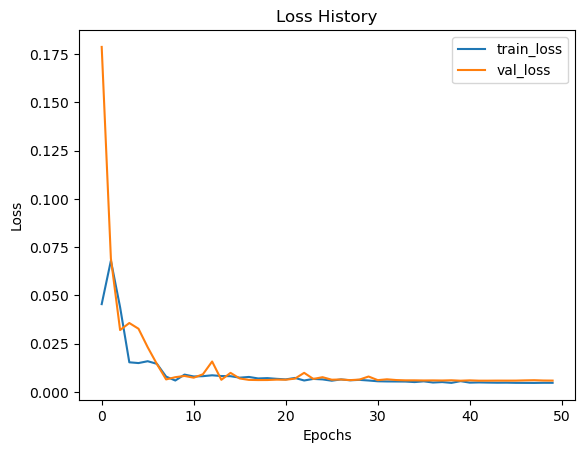

In [43]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

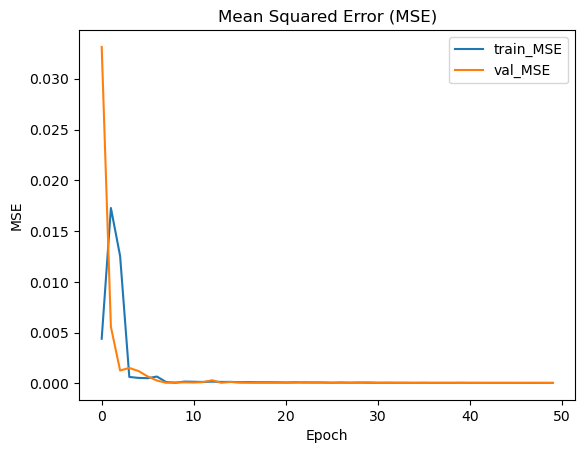

In [44]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

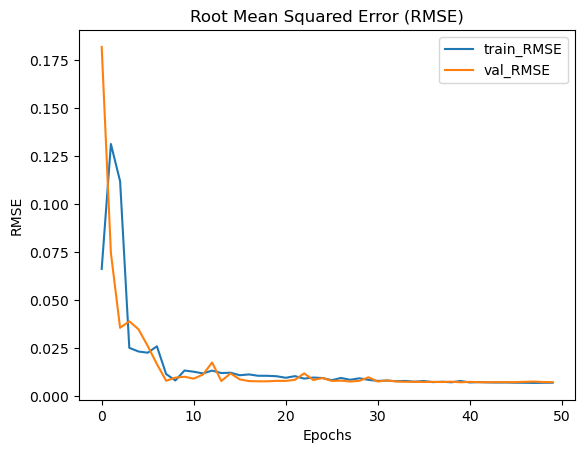

In [45]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

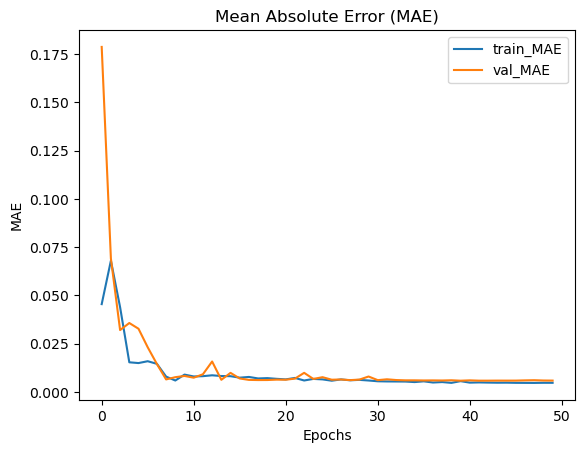

In [46]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

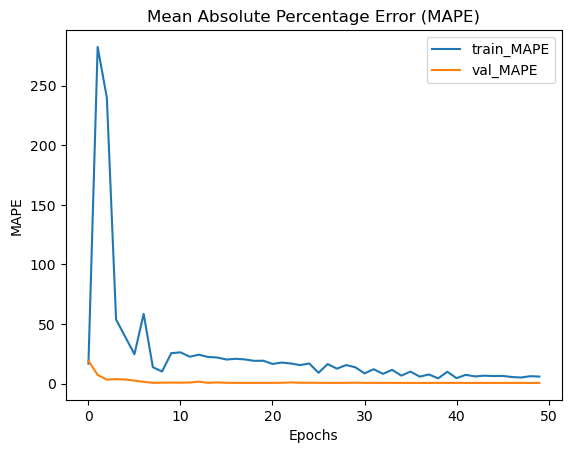

In [47]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 19:31:29.382294: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7599, 4, 2)
Labels Shape: (7599, 1, 1)
Prediction Shape: (7599, 1, 10)


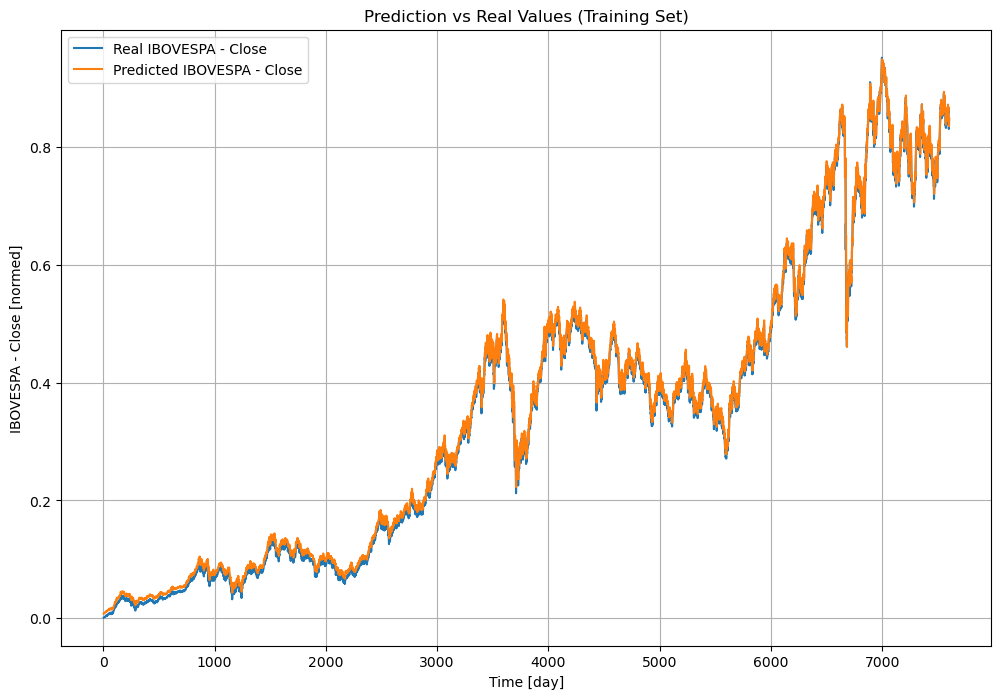

In [48]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 2)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


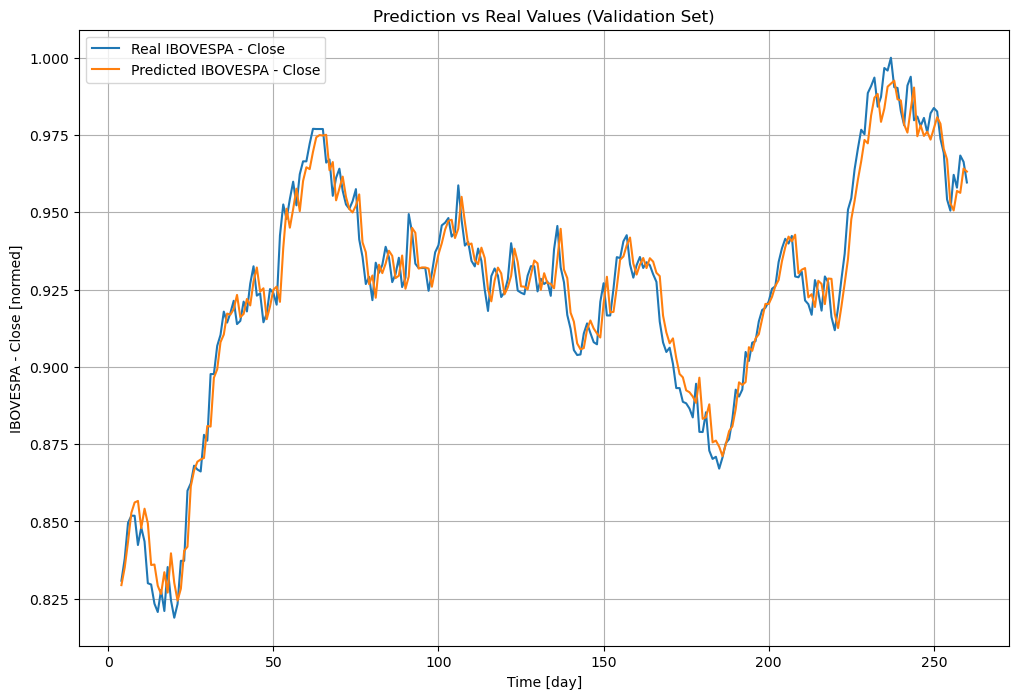

In [49]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 2)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


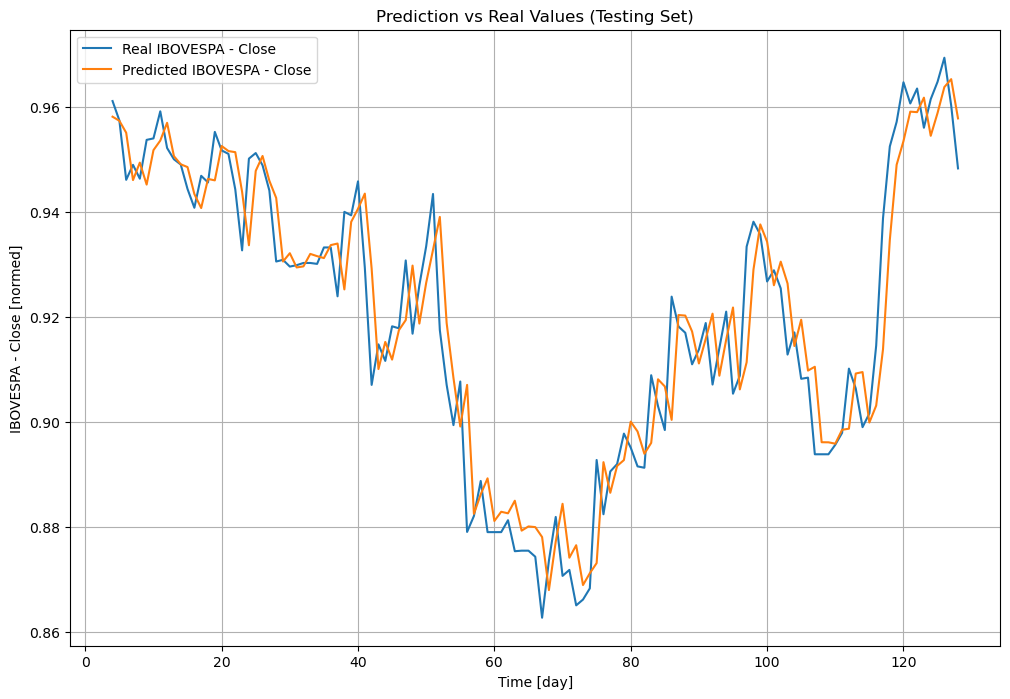

In [50]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

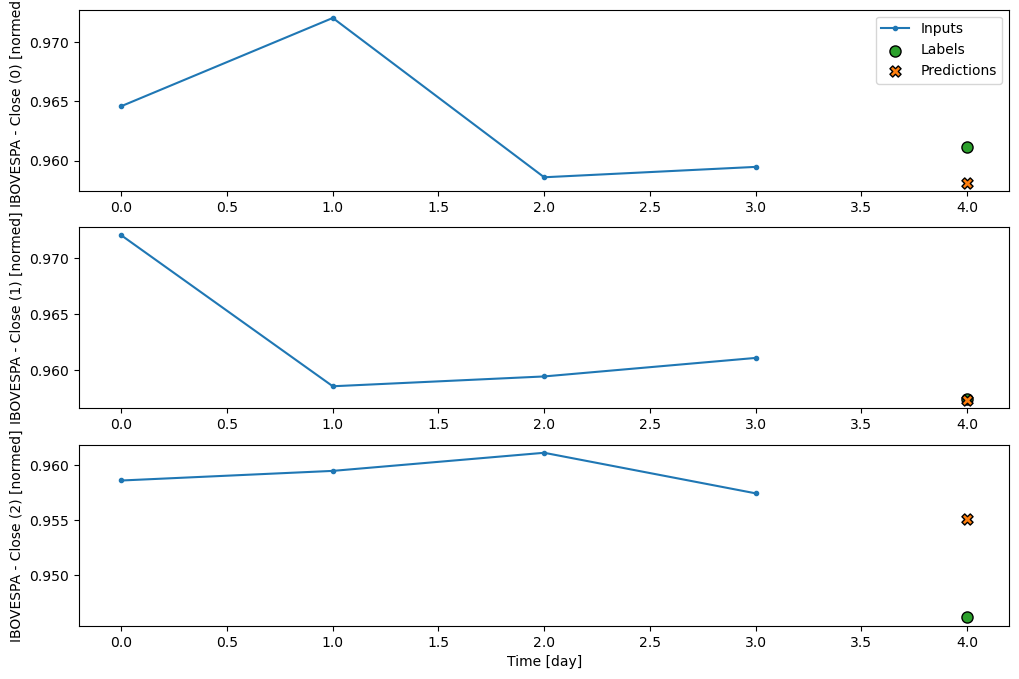

In [51]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [52]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:31s:413ms


In [53]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([[[0.9581319 , 0.9581319 , 0.9581319 , ..., 0.9581319 ,
         0.9581319 , 0.9581319 ]],

       [[0.9573562 , 0.9573562 , 0.9573562 , ..., 0.9573562 ,
         0.9573562 , 0.9573562 ]],

       [[0.95508003, 0.95508003, 0.95508003, ..., 0.95508003,
         0.95508003, 0.95508003]],

       ...,

       [[0.96378505, 0.96378505, 0.96378505, ..., 0.96378505,
         0.96378505, 0.96378505]],

       [[0.96528745, 0.96528745, 0.96528745, ..., 0.96528745,
         0.96528745, 0.96528745]],

       [[0.9578066 , 0.9578066 , 0.9578066 , ..., 0.9578066 ,
         0.9578066 , 0.9578066 ]]], shape=(125, 1, 10), dtype=float32)

In [54]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [55]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')